### Pandas and ThinkStat

In [1]:
############ First we import pandas ############
import pandas as pd
import numpy as np
import math
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
import scipy.stats as stat
import random
from IPython.display import Image


%matplotlib inline
############ Declaration of Series ############
numSeries = pd.Series([-1,52,33,64,15])

In [2]:
############ Viewing Series with Default index ############
numSeries

0    -1
1    52
2    33
3    64
4    15
dtype: int64

In [3]:
############ Finding the type of the Object ############
type(numSeries)

pandas.core.series.Series

In [4]:
############ Getting the values of Series Object ############
numSeries.values

array([-1, 52, 33, 64, 15])

In [5]:
############ Getting the value of the Series Index ############
numSeries.index

RangeIndex(start=0, stop=5, step=1)

In [6]:
############ Customizing the Index ############
numSeries2 = pd.Series([23,45,32,23],index=['a','b','c','d'])

In [7]:
############ viewing customized index ############
numSeries2

a    23
b    45
c    32
d    23
dtype: int64

In [8]:
############ Checking the customized index ############
numSeries2.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [9]:
############ Accessing particular element of the index of a Series Object ############
numSeries2['a']

23

In [10]:
############ Modifying thr particular element of the Series with index to access it ############
numSeries2['a'] = 56

In [11]:
############ validating the modification in the series ############
numSeries2['a']

56

In [12]:
############ Creating DataFrame ############

############ A dict's Key is considered as column for a table in DataFrame and values of Dict is value of ############

############ column in a table. ############

data = {'empid':['E1','E2','E3'],
       'Salary':[10000,25000,40000],
       'Name':['Jack','Joe','Jackie']}

In [13]:
############ Dict object ############
type(data)

dict

In [14]:
############ converting Dict to DataFrame ############
dataframe = pd.DataFrame(data)

In [15]:
############ Simple DataFrame ############
dataframe

,empid,Salary,Name
0,E1,10000,Jack
1,E2,25000,Joe
2,E3,40000,Jackie


In [16]:
############ Accessing Dataframe column ############
dataframe['Name']

0      Jack
1       Joe
2    Jackie
Name: Name, dtype: object

In [17]:
############ New Dataframe ############
data2 = {'empid':['E1','E2','E3'],
       'position':['Junior consultant','consultant','Senior consultant'],
        }
dataframe2 = pd.DataFrame(data2)

In [18]:
############ merging two dataframe ############

df = pd.merge(dataframe,dataframe2,on='empid',how='inner')

In [19]:
############ View the dataframe ############
df.head()

,empid,Salary,Name,position
0,E1,10000,Jack,Junior consultant
1,E2,25000,Joe,consultant
2,E3,40000,Jackie,Senior consultant


In [20]:
#### Storing DF as CSV ############

df.to_csv('Sample_df.csv')

In [21]:
############ Reading a CSV ############

sample_df = pd.read_csv("Sample_df.csv")

In [22]:
############ Duplicate Indexes are created if index is not mentioned while Saving ############
sample_df.head()

,Unnamed: 0,empid,Salary,Name,position
0,0,E1,10000,Jack,Junior consultant
1,1,E2,25000,Joe,consultant
2,2,E3,40000,Jackie,Senior consultant


In [23]:
############ Keeping default Index ############

# We can create different column as your index by mentioning the column name as index='empid'

df.to_csv('Sample_df.csv',index=None)

In [24]:
############ Reading a CSV ############

sample_df = pd.read_csv("Sample_df.csv")
sample_df.head()

,empid,Salary,Name,position
0,E1,10000,Jack,Junior consultant
1,E2,25000,Joe,consultant
2,E3,40000,Jackie,Senior consultant


In [25]:
############ Fetching record based on EMP ID ############

sample_df[sample_df["empid"]=='E1']

,empid,Salary,Name,position
0,E1,10000,Jack,Junior consultant


In [26]:
############ Filtering records based on Salary ############

sample_df[sample_df["Salary"]>=25000] #sample_df[sample_df.Salary>10000]

,empid,Salary,Name,position
1,E2,25000,Joe,consultant
2,E3,40000,Jackie,Senior consultant


In [27]:
############ FIltering using String values of the Columns ############

sample_df[sample_df.position.str.contains('junior',case=False)]

,empid,Salary,Name,position
0,E1,10000,Jack,Junior consultant


### Valuable Functions in Pandas

In [28]:
### Social Network Ads
social_network = pd.read_csv("Social_Network_Ads.csv")

In [29]:
social_network.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [30]:
social_network.shape

(400, 5)

**value_counts()** - The Series class provides a method, value_counts, that counts the number of times each value appears.

In [31]:
social_network["Gender"].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

**isnull** - It finds the number of values in each column with value as null.

In [32]:
social_network.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

sort_index() - It sorts the Series by index, so the values appear in order.

In [33]:
social_network["Age"].value_counts().sort_index()

18     5
19     7
20     7
21     4
22     5
23     6
24     9
25     6
26    16
27    13
28    12
29    10
30    11
31    11
32     9
33     9
34     6
35    32
36    12
37    20
38    13
39    15
40    15
41    16
42    16
43     3
44     2
45     7
46    12
47    14
48    14
49    10
50     4
51     3
52     6
53     5
54     4
55     3
56     3
57     5
58     6
59     7
60     7
Name: Age, dtype: int64

value_counts(sort=False) - It counts the number of times each value appears with least frequent value on top in an increasing order.

In [34]:
social_network["EstimatedSalary"].value_counts(sort=False)

64000     1
85000     2
21000     2
73000     3
42000     5
63000     4
146000    2
20000     5
84000     4
41000     3
105000    1
62000     2
112000    3
126000    1
19000     2
133000    2
147000    1
104000    4
78000     2
61000     6
99000     1
18000     4
16000     2
39000     4
134000    4
60000     7
17000     3
86000     5
38000     3
93000     1
         ..
69000     1
26000     4
125000    2
47000     5
101000    1
108000    4
68000     3
122000    2
129000    1
25000     4
143000    2
46000     1
119000    1
131000    2
95000     1
88000     7
71000     9
45000     2
36000     3
130000    2
66000     2
113000    3
23000     7
89000     6
44000     4
96000     4
65000     6
150000    2
107000    3
43000     7
Name: EstimatedSalary, Length: 117, dtype: int64

describe() - It gives the basic statistical metrics like mean etc.

In [35]:
social_network["EstimatedSalary"].describe()

count       400.000000
mean      69742.500000
std       34096.960282
min       15000.000000
25%       43000.000000
50%       70000.000000
75%       88000.000000
max      150000.000000
Name: EstimatedSalary, dtype: float64

### Consider salary above 140,000 is error or an outlier, then we can eliminate this error using np.nan.

The attribute loc provides several ways to select rows and columns from a DataFrame. In this example, the first expression in brackets is the row indexer; the second expression selects the column.

The expression social_network["EstimatedSalary"] > 140000 yields a Series of type bool, where True indicates that the condition is true. When a boolean Series is used as an index, it selects only the elements that satisfy the condition.


In [36]:
social_network.loc[social_network["EstimatedSalary"] > 140000, "EstimatedSalary"] = np.nan

In [37]:
social_network["EstimatedSalary"].describe()

count       383.000000
mean      66386.422977
std       30793.553815
min       15000.000000
25%       43000.000000
50%       65000.000000
75%       84000.000000
max      139000.000000
Name: EstimatedSalary, dtype: float64

### Histogram

One of the best ways to describe a variable is to report the values that appear in the dataset and how many times each value appears. This description is called the distribution of the variable.

The most common representation of a distribution is a histogram, which is a graph that shows the frequency of each value. In this context, “frequency” means the number of times the value appears.

In [38]:
#Convert series into a list
age = list(social_network["Age"])

# Create dict format for age, it helps in building histogram easily. 
# The result is a dictionary that maps from values to frequencies.
hist = {}
for a in age:
    hist[a] = hist.get(a,0) + 1

In [39]:
#Same as dict format above.
counter = Counter(age)

#The result is a Counter object, which is a subclass of dictionary.

In [40]:
#To loop through the values in order, you can use the built-in function sorted:
for val in sorted(counter):
    print(val, counter[val])

18 5
19 7
20 7
21 4
22 5
23 6
24 9
25 6
26 16
27 13
28 12
29 10
30 11
31 11
32 9
33 9
34 6
35 32
36 12
37 20
38 13
39 15
40 15
41 16
42 16
43 3
44 2
45 7
46 12
47 14
48 14
49 10
50 4
51 3
52 6
53 5
54 4
55 3
56 3
57 5
58 6
59 7
60 7


In [41]:
# Use items() to iterate over the dict/counter.
for value, freq in counter.items():
    print(value, freq)

19 7
35 32
26 16
27 13
32 9
25 6
20 7
18 5
29 10
47 14
45 7
46 12
48 14
49 10
31 11
21 4
28 12
33 9
30 11
23 6
24 9
22 5
59 7
34 6
39 15
38 13
37 20
42 16
40 15
36 12
41 16
58 6
55 3
52 6
60 7
56 3
53 5
50 4
51 3
57 5
44 2
43 3
54 4


### Plotting

Text(0, 0.5, 'Freq')

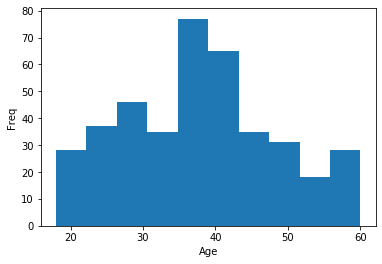

In [42]:
plt.hist(age)
plt.xlabel("Age")
plt.ylabel("Freq")

In [43]:
purchased_customer = social_network[social_network["Purchased"]==1]

Text(0, 0.5, 'Freq')

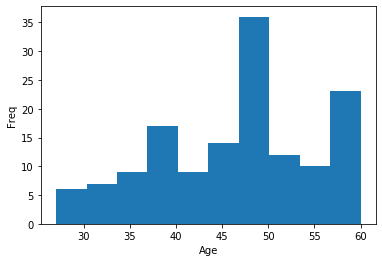

In [44]:
plt.hist(purchased_customer["Age"])
plt.xlabel("Age")
plt.ylabel("Freq")

In [45]:
social_network.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000.0,0
1,15810944,Male,35,20000.0,0
2,15668575,Female,26,43000.0,0
3,15603246,Female,27,57000.0,0
4,15804002,Male,19,76000.0,0


In [46]:
no_purchase = social_network[social_network["Purchased"]==0]

In [47]:
no_purchase.Age.mean()

32.793774319066145

In [48]:
purchased_customer.Age.mean()

46.39160839160839

### Some of the characteristics we might want to report are:

* central tendency: Do the values tend to cluster around a particular point?
* modes: Is there more than one cluster?
* spread: How much variability is there in the values?
* tails: How quickly do the probabilities drop off as we move away from the modes?
* outliers: Are there extreme values far from the modes?

### Why and Why not "Mean" can be used for central tendenancy

Sometimes the mean is a good description of a set of values. For example, apples are all pretty much the same size (at least the ones sold in supermar- kets). So if I buy 6 apples and the total weight is 3 pounds, it would be a reasonable summary to say they are about a half pound each.


But pumpkins are more diverse. Suppose I grow several varieties in my gar- den, and one day I harvest three decorative pumpkins that are 1 pound each, two pie pumpkins that are 3 pounds each, and one Atlantic Giant⃝R pumpkin that weighs 591 pounds. The mean of this sample is 100 pounds, but if I told you “The average pumpkin in my garden is 100 pounds,” that would be misleading. In this example, there is no meaningful average because there is no typical pumpkin.


In [49]:
print("Variance: ",purchased_customer.Age.var())
print("Standard Deviation: ",purchased_customer.Age.std())

Variance:  74.16950654978824
Standard Deviation:  8.612171999547398


In [50]:
print("Variance: ",no_purchase.Age.var())
print("Standard Deviation:",no_purchase.Age.std())

Variance:  63.773711089494114
Standard Deviation: 7.985844419314348


### Effect Size

An effect size is a summary statistic intended to describe (wait for it) the size of an effect. For example, to describe the difference between two groups, one obvious choice is the difference in the means.

https://en.wikipedia.org/wiki/Effect_size

In [51]:
purchased_customer.Age.mean() - no_purchase.Age.mean()

13.597834072542248

In [52]:
purchased_customer["EstimatedSalary"].mean() - no_purchase["EstimatedSalary"].mean()

18564.806840551188

In [53]:
def CohenEffectSize(group1, group2):
    diff = group1.mean() - group2.mean()
    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / math.sqrt(pooled_var)
    return d

In [54]:
CohenEffectSize(purchased_customer.Age, no_purchase.Age)

1.6551957182370178

In [55]:
#Effect Size
13.6/max(social_network["Age"])*100

22.666666666666664

### PMF - Probability Mass Function

### Purchased

In [56]:
pmf_age_purchased = {}
for age in purchased_customer["Age"].value_counts().index:
    pmf_age_purchased[age] = purchased_customer[purchased_customer["Age"]==age]["Age"].count() / purchased_customer["Age"].shape[0]

In [57]:
#The Pmf is normalized so total probability is 1.
sum(list(pmf_age_purchased.values()))

0.9999999999999999

### Not Purchased

In [58]:
pmf_age_no_purchased = {}
for age in no_purchase["Age"].value_counts().index:
    pmf_age_no_purchased[age] = no_purchase[no_purchase["Age"]==age]["Age"].count() / no_purchase["Age"].shape[0]

In [59]:
sum(list(pmf_age_no_purchased.values()))

1.0

### Difference between Hist and PMF

The biggest difference is that a Hist maps from values to integer counters; a Pmf maps from values to floating-point probabilities.

<BarContainer object of 34 artists>

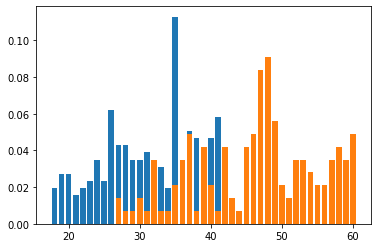

In [60]:
plt.bar(pmf_age_no_purchased.keys(), pmf_age_no_purchased.values())
plt.bar(pmf_age_purchased.keys(), pmf_age_purchased.values())

<BarContainer object of 14 artists>

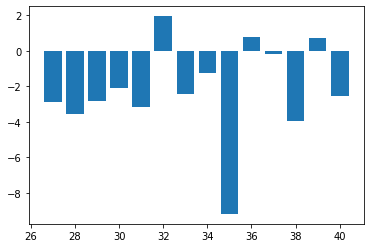

In [61]:
#27-41
ages = range(27, 41)
diffs = []
for age in ages:
    p1 = pmf_age_purchased[age]
    p2 = pmf_age_no_purchased[age]
    diff = 100 * (p1 - p2)
    diffs.append(diff)
plt.bar(ages, diffs)

### Dataframe Indexing

In [62]:
### Create Dataframe from array

array = np.random.randn(4, 2)
df = pd.DataFrame(array)

In [63]:
df

,0,1
0,-0.534567,-0.793312
1,0.684709,0.433876
2,-0.055070,0.714041
3,0.229810,-0.994916


In [64]:
columns = ['A', 'B']
df = pd.DataFrame(array, columns=columns)

In [65]:
index = ['a', 'b', 'c', 'd']
df = pd.DataFrame(array, columns=columns, index=index)
df

,A,B
a,-0.534567,-0.793312
b,0.684709,0.433876
c,-0.055070,0.714041
d,0.229810,-0.994916


### To select a row by label, you can use the loc attribute, which returns a Series

In [66]:
df.loc['a']

A   -0.534567
B   -0.793312
Name: a, dtype: float64

### If the integer position of a row is known, rather than its label, you can use the iloc attribute, which also returns a Series.

In [67]:
df.iloc[0]

A   -0.534567
B   -0.793312
Name: a, dtype: float64

In [68]:
indices = ['a', 'c']
df.loc[indices]

,A,B
a,-0.534567,-0.793312
c,-0.055070,0.714041


In [69]:
df['a':'c']

,A,B
a,-0.534567,-0.793312
b,0.684709,0.433876
c,-0.055070,0.714041


In [70]:
df[0:2]

,A,B
a,-0.534567,-0.793312
b,0.684709,0.433876


Above the result in either case is a DataFrame, but notice that the first result includes the end of the slice; the second doesn’t.

### Limits of PMFs

PMFs work well if the number of values is small. But as the number of values increases, the probability associated with each value gets smaller and the effect of random noise increases.

For example, if we are interested in the distribution of age.
The parts of this figure are hard to interpret. There are many spikes and valleys, and some apparent differences between the distributions. It is hard to tell which of these features are meaningful. Also, it is hard to see overall patterns; for example, which distribution do you think has the higher mean?


These problems can be mitigated by binning the data; that is, dividing the range of values into non-overlapping intervals and counting the number of values in each bin. Binning can be useful, but it is tricky to get the size of the bins right. If they are big enough to smooth out noise, they might also smooth out useful information.
An alternative that avoids these problems is the cumulative distribution function (CDF), which is the subject of this chapter. But before I can explain CDFs, I have to explain percentiles.

### Cumulative Distribution Function

The difference between “percentile” and “percentile rank” can be confusing, and people do not always use the terms precisely. To summarize, PercentileRank takes a value and computes its percentile rank in a set of values; Percentile takes a percentile rank and computes the corresponding value.

In [71]:
def PercentileRank(scores, your_score):
    count = 0
    for score in scores:
        if score <= your_score:
            count += 1
    percentile_rank = 100.0 * count / len(scores)
    return percentile_rank

In [72]:
social_network.dropna(inplace=True)

In [73]:
salary = list(social_network["EstimatedSalary"])

In [74]:
my_sal = 100000

In [75]:
PercentileRank(salary, my_sal)

85.37859007832898

In [76]:
def Percentile(scores, percentile_rank):
    scores.sort()
    for score in scores:
        if PercentileRank(scores, score) >= percentile_rank:
            return score

In [77]:
Percentile(salary, 50)

65000.0

In [78]:
def Percentile2(scores, percentile_rank):
    scores.sort()
    index = percentile_rank * (len(scores)-1) // 100
    return scores[index]

In [79]:
Percentile2(salary, 50)

65000.0

### CDF

The CDF is the function that maps from a value to its percentile rank.

The CDF is a function of x, where x is any value that might appear in the distribution. To evaluate CDF(x) for a particular value of x, we compute the fraction of values in the distribution less than or equal to x.


In [80]:
# This function is almost identical to PercentileRank, except that the result is a probability in the range 0–1 
# rather than a percentile rank in the range 0–100.

def EvalCdf(sample, x):
    count = 0.0
    for value in sample:
        if value <= x:
            count += 1
    prob = count / len(sample)
    return prob

In [81]:
sample = [1, 2, 2, 3, 5]

In [82]:
EvalCdf(sample, 2)

0.6

In [83]:
EvalCdf(sample, 3)

0.8

In [84]:
EvalCdf(sample, 0)

0.0

In [85]:
no_purchase_prob = []
for age in sorted(no_purchase["Age"]):
    no_purchase_prob.append(EvalCdf(no_purchase["Age"], age))

In [86]:
purchase_prob = []
for age in sorted(purchased_customer["Age"]):
    purchase_prob.append(EvalCdf(purchased_customer["Age"], age))

In [87]:
def step_plot(values, probabilities, xlabel, ylabel = "CDF probability"):
    plt.step(values, probabilities)
    plt.grid()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

One way to read a CDF is to look up percentiles. For example, it looks like about 90% of people are aged less than 40 years, who didnt make a purchase. The CDF also provides a visual representation of the shape of the distribution. Common values appear as steep or vertical sections of the CDF; in this example, the mode at 35 years is apparent. 

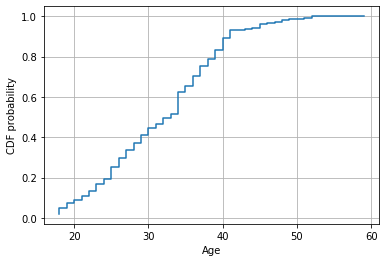

In [88]:
step_plot(sorted(no_purchase["Age"]), no_purchase_prob, "Age")

It looks like about only 30% or less of people are aged less than 40 years, who made a purchase. Remaining 70%le people are aged above 40.

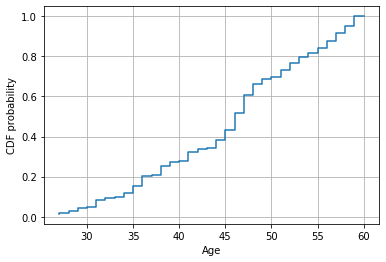

In [89]:
step_plot(sorted(purchased_customer["Age"]), purchase_prob, "Age")

### Estimated Salary (Purchase vs No Purchase)

In [90]:
no_purchase_prob = []
for sal in sorted(no_purchase["EstimatedSalary"]):
    no_purchase_prob.append(EvalCdf(no_purchase["EstimatedSalary"], sal))

In [91]:
purchase_prob = []
for sal in sorted(purchased_customer["EstimatedSalary"]):
    purchase_prob.append(EvalCdf(purchased_customer["EstimatedSalary"], sal))

Under No purchase curve(Blue), the curve remains flat after 90K with minor bilps after that. But under purchase curve(orange), the curve keeps the steps increasing even after 90K, which suggest people with more salary have more purchasing power. And all above 50%le have 90K or more.

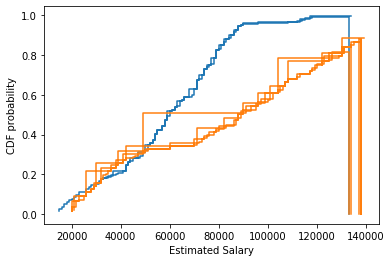

In [92]:
step_plot(sorted(no_purchase["EstimatedSalary"]), no_purchase_prob, "Estimated Salary")
step_plot(sorted(purchased_customer["EstimatedSalary"]), purchase_prob, "Estimated Salary")

**Quantiles:** https://en.wikipedia.org/wiki/Quantile

In [93]:
Percentile(list(purchased_customer["EstimatedSalary"]),75)

123000.0

Percentile ranks are useful for comparing measurements across different groups. For example, people who compete in foot races are usually grouped by age and gender. To compare people in different age groups, you can convert race times to percentile ranks.

A few years ago I ran the James Joyce Ramble 10K in Dedham MA; I finished in 42:44, which was 97th in a field of 1633. I beat or tied 1537 runners out of 1633, so my percentile rank in the field is 94%.
More generally, given position and field size, we can compute percentile rank:


In [94]:
def PositionToPercentile(position, field_size):
    beat = field_size - position + 1
    percentile = 100.0 * beat / field_size
    return percentile

In my age group, denoted M4049 for “male between 40 and 49 years of age”, I came in 26th out of 256. So my percentile rank in my age group was 90%.

If I am still running in 10 years (and I hope I am), I will be in the M5059 division. Assuming that my percentile rank in my division is the same, how much slower should I expect to be?

I can answer that question by converting my percentile rank in M4049 to a position in M5059. Here’s the code:

In [95]:
def PercentileToPosition(percentile, field_size):
    beat = percentile * field_size / 100.0
    position = field_size - beat + 1
    return position

There were 171 people in M5059, so I would have to come in between 17th and 18th place to have the same percentile rank. The finishing time of the 17th runner in M5059 was 46:05, so that’s the time I will have to beat to maintain my percentile rank.

### Modeling Distributions

### Exponential Distribution

The CDF of the exponential distribution is

                            CDF(x) = 1 − e^(−λx)
                            
                            
The parameter, λ, determines the shape of the distribution.In the real world, exponential distributions come up when we look at a series of events and measure the times between events, called interarrival times. If the events are equally likely to occur at any time, the distribution of interarrival times tends to look like an exponential distribution.


In [96]:
babyboom = pd.read_csv('babyboom.dat',sep="    ", header=None)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [97]:
babyboom.columns = ["time", "gender", "weight", "minutes"]

In [98]:
diffs = list(babyboom.minutes.diff())

In [99]:
e_cdf = []
l = 0.5
def exponential_distribution(x):
    e_cdf.append(1 -  math.exp(-1* l * x))

### Normal Distribution

The normal distribution, also called Gaussian, is commonly used because it describes many phenomena, at least approximately. It turns out that there is a good reason for its ubiquity.

The normal distribution is characterized by two parameters: the mean, μ, and standard deviation σ. The normal distribution with μ = 0 and σ = 1 is called the standard normal distribution. Its CDF is defined by an integral that does not have a closed form solution, but there are algorithms that evaluate it efficiently.

In [100]:
def EvalNormalCdf(x, mu=0, sigma=1):
    return stat.norm.cdf(x, loc=mu, scale=sigma)

In [101]:
mu = social_network["Age"].mean()

In [102]:
sigma = social_network["Age"].std()

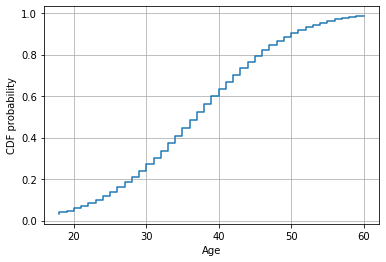

In [103]:
step_plot(sorted(social_network["Age"]),EvalNormalCdf(sorted(social_network["Age"]), mu=mu, sigma=sigma), "Age")

**Pareto Distribution** https://en.wikipedia.org/wiki/Pareto_distribution

**Preferential Attachment** https://en.wikipedia.org/wiki/Preferential_attachment

### Probability Distribution Function

The derivative of CDF is PDF

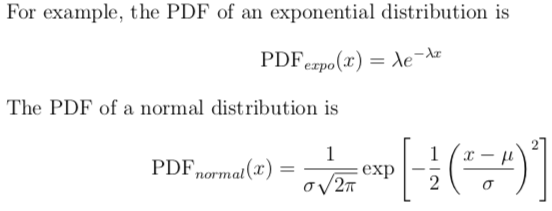

In [104]:
Image('PDF.png')

Evaluating a PDF for a particular value of x is usually not useful. The result
    is not a probability; it is a probability density.
    
In physics, density is mass per unit of volume; in order to get a mass, you have to multiply by volume or, if the density is not constant, you have to integrate over volume.

Similarly, probability density measures probability per unit of x. In order to get a probability mass, you have to integrate over x.

In [105]:
Xs = sorted(social_network["Age"])

In [106]:
mean, std = social_network["Age"].mean(), social_network["Age"].std()
PDF = stat.norm.pdf(Xs, mean, std)

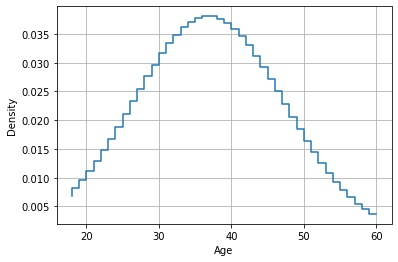

In [107]:
step_plot(Xs, PDF, "Age", ylabel="Density")

### Kernel Density Estimation

Kernel density estimation (KDE) is an algorithm that takes a sample and finds an appropriately smooth PDF that fits the data.

https://en.wikipedia.org/wiki/Kernel_density_estimation

In [108]:
sample = [random.gauss(mean, std) for i in range(500)]

In [109]:
Kernel_density_estimate = stat.gaussian_kde(sample)

In [110]:
sample_pdf = Kernel_density_estimate.evaluate(sorted(social_network["Age"]))

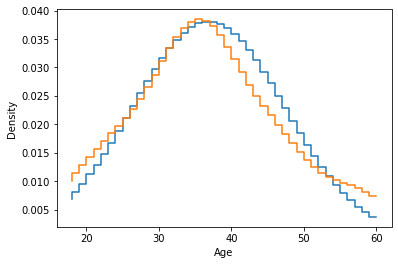

In [111]:
step_plot(Xs, PDF, "Age", ylabel="Density")
step_plot(Xs, sample_pdf, "Age", ylabel="Density")

### Estimating a density function with KDE is useful for several purposes:

* Visualization: During the exploration phase of a project, CDFs are usually the best visualization of a distribution. After you look at a CDF, you can decide whether an estimated PDF is an appropriate model of the distribution. If so, it can be a better choice for presenting the distribution to an audience that is unfamiliar with CDFs.
* Interpolation: An estimated PDF is a way to get from a sample to a model of the population. If you have reason to believe that the population distribution is smooth, you can use KDE to interpolate the density for values that don’t appear in the sample.
* Simulation: Simulations are often based on the distribution of a sample. If the sample size is small, it might be appropriate to smooth the sample distribution using KDE, which allows the simulation to explore more possible outcomes, rather than replicating the observed data.


### The distribution framework

We started with PMFs, which represent the probabilities for a discrete set of values. To get from a PMF to a CDF, you 
add up the probability masses to get cumulative probabilities. To get from a CDF back to a PMF, you compute differences in cumulative probabilities.

A PDF is the derivative of a continuous CDF; or, equivalently, a CDF is the integral of a PDF. Remember that a PDF maps from values to probability densities; to get a probability, you have to integrate.

To get from a discrete to a continuous distribution, you can perform various kinds of smoothing. One form of smoothing is to assume that the data come from an analytic continuous distribution (like exponential or normal) and to estimate the parameters of that distribution. Another option is kernel density estimation.

The opposite of smoothing is discretizing, or quantizing. If you evaluate a PDF at discrete points, you can generate a PMF that is an approximation of the PDF. You can get a better approximation using numerical integration.

To distinguish between continuous and discrete CDFs, it might be better for a discrete CDF to be a “cumulative mass function,” but as far as I can tell no one uses that term.

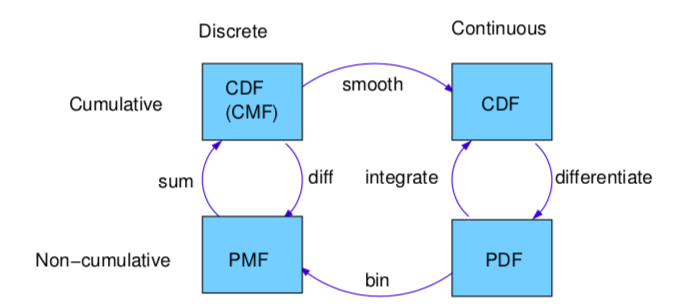

In [112]:
Image('distributions.png')

Pmf and Hist are almost the same thing, except that a Pmf maps values to floating-point probabilities, rather than integer frequencies. If the sum of the probabilities is 1, the Pmf is normalized. Pmf provides Normalize, which computes the sum of the probabilities and divides through by a factor

https://en.wikipedia.org/wiki/Moment_of_inertia

### Skewness


Skewness is a property that describes the shape of a distribution. If the distribution is symmetric around its central tendency, it is unskewed. If the values extend farther to the right, it is “right skewed” and if the values extend left, it is “left skewed.”

This use of “skewed” does not have the usual connotation of “biased.” Skewness only describes the shape of the distribution; it says nothing about whether the sampling process might have been biased.

A way to evaluate the asymmetry of a distribution is to look at the relationship between the mean and median. Extreme values have more effect on the mean than the median, so in a distribution that skews left, the mean is less than the median. In a distribution that skews right, the mean is greater.

**Pearson’s median skewness coefficient** is a measure of skewness based on the difference between the sample mean and median:

                                            gp = 3(x ̄ − m)/S
                                            
Where x ̄ is the sample mean, m is the median, and S is the standard deviation.


The sign of the skewness coefficient indicates whether the distribution skews left or right, but other than that, they are hard to interpret. Sample skewness is less robust; that is, it is more susceptible to outliers. As a result it is less reliable when applied to skewed distributions, exactly when it would be most relevant.

Pearson’s median skewness is based on a computed mean and variance, so it is also susceptible to outliers, but since it does not depend on a third moment, it is somewhat more robust.

### Relationship between two variables

Two variables are related if knowing one gives you information about the other. For example, height and weight are related; people who are taller tend to be heavier. Of course, it is not a perfect relationship: there are short heavy people and tall light ones. But if you are trying to guess someone’s weight, you will be more accurate if you know their height than if you don’t.

### Scatter Plot

In [113]:
mall_customer = pd.read_csv("Mall_Customers.csv")

In [114]:
mall_customer.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Overlapping data points look darker, so darkness is proportional to density. In this version of the plot we can see two details that were not apparent before: vertical clusters at Annual income 57k$. 

Jittering: https://blogs.sas.com/content/iml/2011/07/05/jittering-to-prevent-overplotting-in-statistical-graphics.html

Text(0.5, 0, 'Age')

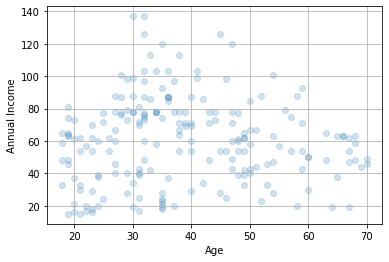

In [115]:
plt.scatter(mall_customer["Age"], mall_customer["Annual Income (k$)"],alpha=0.2)
plt.grid()
plt.ylabel("Annual Income")
plt.xlabel("Age")

### HexBin for large Dataset

To handle larger datasets, another option is a hexbin plot, which divides the graph into hexagonal bins and colors each bin according to how many data points fall in it. An advantage of a hexbin is that it shows the shape of the relationship well, and it is efficient for large datasets, both in time and in the size of the file it generates. A drawback is that it makes the outliers invisible.

### Characterizing the Relationship

Scatter plots provide a general impression of the relationship between vari- ables, but there are other visualizations that provide more insight into the nature of the relationship. One option is to bin one variable and plot percentiles of the other.

In [116]:
mall_customer.Age.describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

Digitize computes the index of the bin that contains each value in df.htm3. The result is a NumPy array of integer indices. Values that fall below the lowest bin are mapped to index 0. Values above the highest bin are mapped to len(bins).

In [117]:
bins = np.arange(18, 75, 5)

In [118]:
indices = np.digitize(mall_customer.Age, bins)

groupby is a DataFrame method that returns a GroupBy object; used in a for loop, groups iterates the names of the groups and the DataFrames that represent them.

In [119]:
groups = mall_customer.groupby(indices)

So, for example, we can print the number of rows in each group like this:

In [120]:
for i, group in groups:
    print(i, len(group))

1 25
2 21
3 35
4 26
5 19
6 17
7 21
8 10
9 9
10 11
11 6


In [121]:
for i, group in groups:
    print(i, len(group))

1 25
2 21
3 35
4 26
5 19
6 17
7 21
8 10
9 9
10 11
11 6


In [122]:
ages = [group.Age.mean() for i, group in groups]

In [123]:
#heights

In [124]:
cdf_group_income = defaultdict(list)
for i, grp in groups:
    for income in grp["Annual Income (k$)"]:
        cdf_group_income[i].append(EvalCdf(grp["Annual Income (k$)"], income))

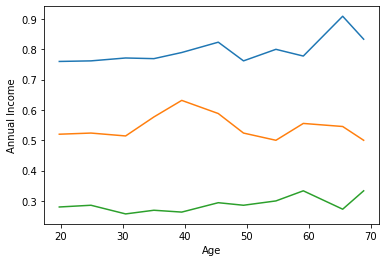

In [125]:
for percent in [75, 50, 25]:
    incomes = [Percentile(cdf_group_income[k], percent) for k,v in cdf_group_income.items()]
    label = '%dth' %percent
    plt.plot(ages, incomes)
    plt.xlabel("Age")
    plt.ylabel("Annual Income")

### Correlation

A correlation is a statistic intended to quantify the strength of the relationship between two variables.

A challenge in measuring correlation is that the variables we want to compare are often not expressed in the same units. And even if they are in the same units, they come from different distributions.

There are two common solutions to these problems:
1. Transform each value to a standard score, which is the number of standard deviations from the mean. This transform leads to the “Pearson product-moment correlation coefficient.”
2. Transform each value to its rank, which is its index in the sorted list of values. This transform leads to the “Spearman rank correlation coefficient.”

If X is a series of n values, xi, we can convert to standard scores by subtracting the mean and dividing by the standard deviation: zi = (xi − μ)/σ.

The numerator is a deviation: the distance from the mean. Dividing by σ standardizes the deviation, so the values of Z are dimensionless (no units) and their distribution has mean 0 and variance 1.

If X is normally distributed, so is Z. But if X is skewed or has outliers, so does Z; in those cases, it is more robust to use percentile ranks. If we compute a new variable, R, so that ri is the rank of xi, the distribution of R is uniform from 1 to n, regardless of the distribution of X.

### Covariance

Covariance is a measure of the tendency of two variables to vary together.
If we have two series, X and Y , their deviations from the mean are 
                    
                    dxi = xi − x ̄
                    dyi = yi − y ̄


where x ̄ is the sample mean of X and y ̄ is the sample mean of Y. If X and Y vary together, their deviations tend to have the same sign.

If we multiply them together, the product is positive when the deviations have the same sign and negative when they have the opposite sign. So adding up the products gives a measure of the tendency to vary together.

Covariance is the mean of these products: Cov(X,Y)= 1/n * SUMMATION 􏱅(dxi*dyi)
 

where n is the length of the two series (they have to be the same length).

If you have studied linear algebra, you might recognize that Cov is the dot product of the deviations, divided by their length. So the covariance is maximized if the two vectors are identical, 0 if they are orthogonal, and negative if they point in opposite directions.

In [126]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)
    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

**By default Cov computes deviations from the sample means, or you can provide known means.** If xs and ys are Python sequences, np.asarray converts them to NumPy arrays. If they are already NumPy arrays, np.asarray does nothing.

This implementation of covariance is meant to be simple for purposes of explanation. NumPy and pandas also provide implementations of covariance, but both of them apply a correction for small sample sizes that we have not covered yet, and np.cov returns a covariance matrix, which is more than we need for now.

### Pearson Correlation

Covariance is useful in some computations, but it is seldom reported as a summary statistic because it is hard to interpret. Among other problems, its units are the product of the units of X and Y .

One solution to this problem is to divide the deviations by the standard deviation, which yields standard scores, and 

    compute the product of standard scores:
    
                                        p i = ( x i − x ̄ )*( y i − y ̄ )/ SX*SY
                                        
Where SX and SY are the standard deviations of X and Y . The mean of these products is

    ρ = 1/n SUMMATION􏱅 pi
    
Or we can rewrite ρ by factoring out SX and SY :
    
    ρ= Cov(X,Y)/SX*SY

This value is called Pearson’s correlation after Karl Pearson, an influential early statistician. It is easy to compute and easy to interpret. Because standard scores are dimensionless, so is ρ.

In [127]:
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    meanx, varx = np.mean(xs), np.var(xs)
    meany, vary = np.mean(ys), np.var(ys)
    corr = Cov(xs, ys, meanx, meany) / math.sqrt(varx * vary)
    return corr

MeanVar computes mean and variance slightly more efficiently than separate calls to np.mean and np.var.

Pearson’s correlation is always between -1 and +1 (including both). If ρ is positive, we say that the correlation is positive, which means that when one variable is high, the other tends to be high. If ρ is negative, the correlation is negative, so when one variable is high, the other is low.

The magnitude of ρ indicates the strength of the correlation. If ρ is 1 or -1, the variables are perfectly correlated, which means that if you know one, you can make a perfect prediction about the other.

Most correlation in the real world is not perfect, but it is still useful. The correlation of height and weight is 0.51, which is a strong correlation compared to similar human-related variables.

### Nonlinear Relationship

If Pearson’s correlation is near 0, it is tempting to conclude that there is no relationship between the variables, but that conclusion is not valid. Pear- son’s correlation only measures linear relationships. If there’s a nonlinear relationship, ρ understates its strength.


https://wikipedia.org/wiki/Correlation_and_dependence

Look at a scatter plot of your data before blindly computing a correlation coefficient.

### Spearman’s rank correlation

Pearson’s correlation works well if the relationship between variables is linear and if the variables are roughly normal. But it is not robust in the presence of outliers. Spearman’s rank correlation is an alternative that mitigates the effect of outliers and skewed distributions. 

To compute Spearman’s correlation, we have to compute the rank of each value, which is its index in the sorted sample. For example, in the sample [1, 2, 5, 7] the rank of the value 5 is 3, because it appears third in the sorted list. Then we compute Pearson’s correlation for the ranks.

In [128]:
def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

I convert the arguments to pandas Series objects so I can use rank, which computes the rank for each value and returns a Series. Then I use Corr to compute the correlation of the ranks.

I could also use Series.corr directly and specify Spearman’s method:

In [129]:
def SpearmanCorr(xs, ys):
    xs = pd.Series(xs)
    ys = pd.Series(ys)
    return xs.corr(ys, method='spearman')

In [130]:
SpearmanCorr(mall_customer["Age"], mall_customer["Annual Income (k$)"])

0.01976676939845659

In [131]:
SpearmanCorr(mall_customer["Annual Income (k$)"], mall_customer["Spending Score (1-100)"])

0.007839641317528493

In [132]:
SpearmanCorr(mall_customer["Age"], mall_customer["Spending Score (1-100)"])

-0.3449397740165373

In [133]:
SpearmanCorr(social_network["Age"], social_network["EstimatedSalary"])

0.09378598343841989

In [134]:
Corr(social_network["Age"], social_network["EstimatedSalary"])

0.11872351731101616

The Spearman rank correlation for the BRFSS data is 0.54, a little higher than the Pearson correlation, 0.51. There are several possible reasons for the difference, including:

* If the relationship is nonlinear, Pearson’s correlation tends to underestimate the strength of the relationship, and
* Pearson’s correlation can be affected (in either direction) if one of the distributions is skewed or contains outliers. Spearman’s rank correlation is more robust.


### Correlation and causation

If variables A and B are correlated, there are three possible explanations: A causes B, or B causes A, or some other set of factors causes both A and B. These explanations are called “causal relationships”.

Correlation alone does not distinguish between these explanations, so it does not tell you which ones are true. This rule is often summarized with the phrase “Correlation does not imply causation,” which is so pithy it has its own Wikipedia page: http://wikipedia.org/wiki/Correlation_does_not_imply_causation.

So what can you do to provide evidence of causation?
1. Use time. If A comes before B, then A can cause B but not the other way around (at least according to our common understanding of causation). The order of events can help us infer the direction of causation, but it does not preclude the possibility that something else causes both A and B.
2. Use randomness. If you divide a large sample into two groups at ran- dom and compute the means of almost any variable, you expect the difference to be small. If the groups are nearly identical in all variables but one, you can eliminate spurious relationships.

This works even if you don’t know what the relevant variables are, but it works even better if you do, because you can check that the groups are identical.

These ideas are the motivation for the randomized controlled trial, in which subjects are assigned randomly to two (or more) groups: a treatment group that receives some kind of intervention, like a new medicine, and a control group that receives no intervention, or another treatment whose effects are known.

A randomized controlled trial is the most reliable way to demonstrate a causal relationship, and the foundation of science-based medicine (see http://wikipedia.org/wiki/Randomized_controlled_trial).

Unfortunately, controlled trials are only possible in the laboratory sciences, medicine, and a few other disciplines. 

In the social sciences, controlled experiments are rare, usually because they are impossible or unethical.

An alternative is to look for a natural experiment, where different “treatments” are applied to groups that are otherwise similar. One danger of natural experiments is that the groups might differ in ways that are not apparent. You can read more about this topic at http://wikipedia.org/wiki/Natural_experiment.

### Estimation

Let’s play a game. I think of a distribution, and you have to guess what it is. I’ll give you two hints: it’s a normal distribution, and here’s a random sample drawn from it:

[-0.441, 1.774, -0.101, -1.138, 2.975, -2.138]

What do you think is the mean parameter, μ, of this distribution?

One choice is to use the sample mean, x ̄, as an estimate of μ. In this example, x ̄ is 0.155, so it would be reasonable to guess μ = 0.155. This process is called estimation, and the statistic we used (the sample mean) is called an estimator.

Using the sample mean to estimate μ is so obvious that it is hard to imagine a reasonable alternative. But suppose we change the game by introducing outliers.

**Estimation if Outlier exists**

I’m thinking of a distribution. It’s a normal distribution, and here’s a sam- ple that was collected by an unreliable surveyor who occasionally puts the decimal point in the wrong place.


[-0.441, 1.774, -0.101, -1.138, 2.975, -213.8]

Now what’s your estimate of μ? If you use the sample mean, your guess is -35.12. Is that the best choice? What are the alternatives?

**One option is to identify and discard outliers, then compute the sample mean of the rest. Another option is to use the median as an estimator.**

Which estimator is best depends on the circumstances (for example, whether there are outliers) and on what the goal is. Are you trying to minimize errors, or maximize your chance of getting the right answer?
If there are no outliers, the sample mean minimizes the mean squared error (MSE).

That is, if we play the game many times, and each time compute the error x ̄ − μ, the sample mean minimizes 
                
                M S E = 1/m SUMMATION􏰄 ( x ̄ − μ )^2

Where m is the number of times you play the estimation game, not to be confused with n, which is the size of the sample used to compute x ̄.
Here is a function that simulates the estimation game and computes the root mean squared error (RMSE), which is the square root of MSE:

In [135]:
def RMSE(estimates, actual):
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return math.sqrt(mse)

In [136]:
def Estimate1(n=7, m=1000):
    mu = 0
    sigma = 1
    means = []
    medians = []
    for _ in range(m):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)
    print('rmse xbar', RMSE(means, mu))
    print('rmse median', RMSE(medians, mu))

In [137]:
Estimate1()

rmse xbar 0.389841227350547
rmse median 0.4582431980858007


estimates is a list of estimates; actual is the actual value being estimated. In practice, of course, we don’t know actual; if we did, we wouldn’t have to estimate it. The purpose of this experiment is to compare the performance of the two estimators.

When I ran this code, the RMSE of the sample mean was 0.38, which means that if we use x ̄ to estimate the mean of this distribution, based on a sample with n = 7, we should expect to be off by 0.38 on average. Using the median to estimate the mean yields RMSE 0.45, which confirms that x ̄ yields lower RMSE, at least for this example.

Minimizing MSE is a nice property, but it’s not always the best strategy. For example, suppose we are estimating the distribution of wind speeds at a building site. If the estimate is too high, we might overbuild the structure, increasing its cost. But if it’s too low, the building might collapse. **Because cost as a function of error is not symmetric, minimizing MSE is not the best strategy.**

As another example, suppose I roll three six-sided dice and ask you to predict the total. If you get it exactly right, you get a prize; otherwise you get nothing. In this case the value that **minimizes MSE is 10.5**, but that would be a bad guess, because the total of three dice is never 10.5. For this game, you want an estimator that has the highest chance of being right, which is a **maximum likelihood estimator (MLE)**. If you pick 10 or 11, your chance of winning is 1 in 8, and that’s the best you can do.


### Estimate Variance 

I’m thinking of a distribution. It’s a normal distribution, and here’s a (familiar) sample:

[-0.441, 1.774, -0.101, -1.138, 2.975, -2.138]

What do you think is the variance, σ2, of my distribution? Again, the obvious choice is to use the sample variance, S^2, as an estimator.

                    S^2 = 1/n SUMMATION􏰄 ( x i − x ̄ )^2
                    
For large samples, S^2 is an adequate estimator, but for small samples it tends to be too low. Because of this unfortunate property, it is called a biased estimator. An estimator is unbiased if the expected total (or mean) error, after many iterations of the estimation game, is 0.

Fortunately, there is another simple statistic that is an unbiased estimator of σ2:

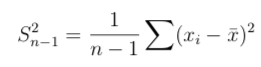

In [138]:
Image('unbiased_estimator.png')

For an explanation of why S^2 is biased, and a proof that (Sn−1)^2 is unbiased, http://wikipedia.org/wiki/Bias_of_an_estimator.

The biggest problem with this estimator is that its name and symbol are used inconsistently. The name “sample variance” can refer to either S^2 or (Sn−1)^2, and the symbol S^2 is used for either or both.
Here is a function that simulates the estimation game and tests the perfor- mance of S^2 and (Sn−1)^2:

In [139]:
def Estimate2(n=7, m=1000):
    mu = 0
    sigma = 1
    estimates1 = []
    estimates2 = []
    for _ in range(m):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)
        print('mean error biased', MeanError(estimates1, sigma**2))
        print('mean error unbiased', MeanError(estimates2, sigma**2))


Again, n is the sample size and m is the number of times we play the game. np.var computes S^2 by default and (Sn−1)^2 if you provide the argument ddof=1, which stands for “delta degrees of freedom.” 
DOF: http://en.wikipedia.org/wiki/Degrees_of_freedom_(statistics).

### Mean Error

MeanError computes the mean difference between the estimates and the actual value:

In [140]:
def MeanError(estimates, actual):
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)

When I ran this code, the mean error for S^2 was -0.13. As expected, this biased estimator tends to be too low. For (Sn−1)^2, the mean error was 0.014, about 10 times smaller. As m increases, we expect the mean error for (Sn−1)^2 to approach 0.

Properties like MSE and bias are long-term expectations based on many iterations of the estimation game.

But when you apply an estimator to real data, you just get one estimate. It would not be meaningful to say that the estimate is unbiased; being unbiased is a property of the estimator, not the estimate.

After you choose an estimator with appropriate properties, and use it to generate an estimate, the next step is to characterize the uncertainty of the estimate.

In [141]:
#Estimate2()

### Sampling Distributions

Suppose you are a scientist studying gorillas in a wildlife preserve. You want to know the average weight of the adult female gorillas in the preserve. To weigh them, you have to tranquilize them, which is dangerous, expensive, and possibly harmful to the gorillas. But if it is important to obtain this information, it might be acceptable to weigh a sample of 9 gorillas. Let’s assume that the population of the preserve is well known, so we can choose a representative sample of adult females. We could use the sample mean, x ̄, to estimate the unknown population mean, μ.


Having weighed 9 female gorillas, you might find x ̄ = 90 kg and sample standard deviation, S = 7.5 kg. The sample mean is an unbiased estimator of μ, and in the long run it minimizes MSE. So if you report a single estimate that summarizes the results, you would report 90 kg.

**But how confident should you be in this estimate? If you only weigh n = 9 gorillas out of a much larger population, you might be unlucky and choose the 9 heaviest gorillas (or the 9 lightest ones) just by chance. Variation in the estimate caused by random selection is called sampling error.**

**Sampling Error**

To quantify sampling error, we can simulate the sampling process with hypothetical values of μ and σ, and see how much x ̄ varies.

Since we don’t know the actual values of μ and σ in the population, we’ll use the estimates x ̄ and S. So the question we answer is: “If the actual values of μ and σ were 90 kg and 7.5 kg, and we ran the same experiment many times, how much would the estimated mean, x ̄, vary?”

In [142]:
def SimulateSample(mu=90, sigma=7.5, n=9, m=1000):
    means = []
    for j in range(m):
        xs = np.random.normal(mu, sigma, n)
        xbar = np.mean(xs)
        means.append(xbar)
    
    return sorted(means)

mu and sigma are the hypothetical values of the parameters. n is the sample size, the number of gorillas we measured. m is the number of times we run the simulation.

In [143]:
means = SimulateSample()

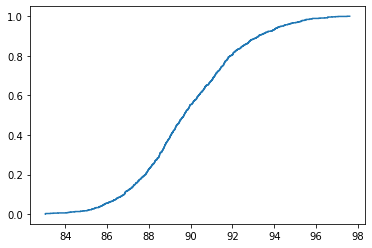

In [144]:
cdfs = [EvalCdf(means,m) for m in means]
plt.step(sorted(means),cdfs)

In [145]:
ci_5 = Percentile(means, 5)
ci_95 = Percentile(means, 95)
print(ci_5, ci_95)
stderr = RMSE(means, 90)

85.86936568829194 94.42958052238515


In [146]:
stderr

2.5259610241057353

In each iteration, we choose n values from a normal distribution with the given parameters, and compute the sample mean, xbar. We run 1000 simulations and then compute the distribution, cdf, of the estimates. The result is shown in Figure. This distribution is called the sampling distribution of the estimator. It shows how much the estimates would vary if we ran the experiment over and over.

The mean of the sampling distribution is pretty close to the hypothetical value of μ, which means that the experiment yields the right answer, on average. After 1000 tries, the lowest result is 82 kg, and the highest is 98 kg. This range suggests that the estimate might be off by as much as 8 kg.


There are two common ways to summarize the sampling distribution:
* Standard error (SE) is a measure of how far we expect the estimate to be off, on average. For each simulated experiment, we compute the error, x ̄ − μ, and then compute the root mean squared error (RMSE). In this example, it is roughly 2.5 kg.
* A confidence interval (CI) is a range that includes a given fraction of the sampling distribution. For example, the 90% confidence interval is the range from the 5th to the 95th percentile. In this example, the 90% CI is (86, 94) kg.

### Standard errors and confidence intervals are the source of much confusion:

* People often confuse standard error and standard deviation. Remember that standard deviation describes variability in a measured quantity; in this example, the standard deviation of gorilla weight is 7.5 kg. Standard error describes variability in an estimate. In this example, the standard error of the mean, based on a sample of 9 measurements, is 2.5 kg.

One way to remember the difference is that, as sample size increases, standard error gets smaller; standard deviation does not.
* People often think that there is a 90% probability that the actual pa- rameter, μ, falls in the 90% confidence interval. Sadly, that is not true. If you want to make a claim like that, you have to use Bayesian methods (see my book, Think Bayes).

The sampling distribution answers a different question: it gives you a sense of how reliable an estimate is by telling you how much it would vary if you ran the experiment again.

It is important to remember that confidence intervals and standard errors only quantify sampling error; that is, error due to measuring only part of the population. The sampling distribution does not account for other sources of error, notably sampling bias and measurement error.

### Sampling Bias

Suppose that instead of the weight of gorillas in a nature preserve, you want to know the average weight of women in the city where you live. It is unlikely that you would be allowed to choose a representative sample of women and weigh them.

A simple alternative would be “telephone sampling;” that is, you could choose random numbers from the phone book, call and ask to speak to an adult woman, and ask how much she weighs.

Telephone sampling has obvious limitations. For example, the sample is limited to people whose telephone numbers are listed, so it eliminates people without phones (who might be poorer than average) and people with unlisted numbers (who might be richer). Also, if you call home telephones during the day, you are less likely to sample people with jobs. And if you only sample the person who answers the phone, you are less likely to sample people who share a phone line.

If factors like income, employment, and household size are related to weight and it is plausible that they are the results of your survey would be affected one way or another. This problem is called **sampling bias** because it is a property of the sampling process.

This sampling process is also vulnerable to self-selection, which is a kind of sampling bias. Some people will refuse to answer the question, and if the tendency to refuse is related to weight, that would affect the results.

Finally, if you ask people how much they weigh, rather than weighing them, the results might not be accurate. Even helpful respondents might round up or down if they are uncomfortable with their actual weight. And not all respondents are helpful. These inaccuracies are examples of measurement error.

When you report an estimated quantity, it is useful to report standard error, or a confidence interval, or both, in order to quantify sampling error. But it is also important to remember that sampling error is only one source of error, and often it is not the biggest.


### Exponential distributions

Let’s play one more round of the estimation game. I’m thinking of a distribution. It’s an exponential distribution, and here’s a sample:

[5.384, 4.493, 19.198, 2.790, 6.122, 12.844]

What do you think is the parameter, λ, of this distribution?
In general, the mean of an exponential distribution is 1/λ, so working backwards, we might choose
            
                                            L = 1 / x ̄
            
L is an estimator of λ. And not just any estimator; it is also the maximum likelihood estimator (see http://wikipedia.org/wiki/Exponential_distribution#Maximum_likelihood). So if you want to maximize your chance of guessing λ exactly, L is the way to go.

But we know that x ̄ is not robust in the presence of outliers, so we expect L to have the same problem.

We can choose an alternative based on the sample median. The median of an exponential distribution is ln(2)/λ,
so working backwards again, we can define an estimator

                                            Lm = ln(2)/m 

where m is the sample median. To test the performance of these estimators, we can simulate the sampling process:

In [147]:
def Estimate3(n=7, m=1000):
    lam = 2
    means = []
    medians = []
    for _ in range(m):
        xs = np.random.exponential(1.0/lam, n)
        L = 1 / np.mean(xs)
        Lm = math.log(2) / pd.Series(xs).median()
        means.append(L)
        medians.append(Lm)
    print('rmse L', RMSE(means, lam))
    print('rmse Lm', RMSE(medians, lam))
    print('mean error L', MeanError(means, lam))
    print('mean error Lm', MeanError(medians, lam))

When I run this experiment with λ = 2, the RMSE of L is 1.1. For the median-based estimator Lm, RMSE is 2.2. We can’t tell from this experiment whether L minimizes MSE, but at least it seems better than Lm.
Sadly, it seems that both estimators are biased. For L the mean error is 0.39; for Lm it is 0.54. And neither converges to 0 as m increases. It turns out that x ̄ is an unbiased estimator of the mean of the distribution, 1/λ, but L is not an unbiased estimator of λ. The values changes with each call to the function.

In [148]:
Estimate3()

rmse L 1.0857588068664101
rmse Lm 1.7889627830463621
mean error L 0.3691143145881212
mean error Lm 0.49202226004267363


### Hypothesis Testing

The fundamental question we want to address is whether the effects we see in a sample are likely to appear in the larger population. For example, in the Social Network ads sample we see a difference in mean Age for purchased customer and others. We would like to know if that effect reflects a real difference for women in the U.S., or if it might appear in the sample by chance.

There are several ways we could formulate this question, including Fisher null hypothesis testing, Neyman-Pearson decision theory, and Bayesian in- ference1. What I present here is a subset of all three that makes up most of what people use in practice, which I will call classical hypothesis testing.


The goal of classical hypothesis testing is to answer the question, “Given a sample and an apparent effect, what is the probability of seeing such an effect by chance?” Here’s how we answer that question:

* The first step is to quantify the size of the apparent effect by choosing a test statistic. In the Social Network ads example, the apparent effect is a difference in Age between purchased customer and others, so a natural choice for the test statistic is the difference in means between the two groups.

* The second step is to define a null hypothesis, which is a model of the system based on the assumption that the apparent effect is not real. Social Network ads example the null hypothesis is that there is no difference between purchased customer and others; that is, that age for both groups have the same distribution.

* The third step is to compute a p-value, which is the probability of seeing the apparent effect if the null hypothesis is true. In the Social Network ads example, we would compute the actual difference in means, then compute the probability of seeing a difference as big, or bigger, under the null hypothesis.

* The last step is to interpret the result. If the p-value is low, the effect is said to be statistically significant, which means that it is unlikely to have occurred by chance. In that case we infer that the effect is more likely to appear in the larger population.

The logic of this process is similar to a proof by contradiction. To prove a mathematical statement, A, you assume temporarily that A is false. If that assumption leads to a contradiction, you conclude that A must actually be true.

Similarly, to test a hypothesis like, “This effect is real,” we assume, temporarily, that it is not. That’s the null hypothesis. Based on that assumption, we compute the probability of the apparent effect. That’s the p-value. If the p-value is low, we conclude that the null hypothesis is unlikely to be true.

### Implement Hypothesis Testing

As a simple example2, suppose we toss a coin 250 times and see 140 heads and 110 tails. Based on this result, we might suspect that the coin is biased; that is, more likely to land heads. To test this hypothesis, we compute the probability of seeing such a difference if the coin is actually fair:


In [149]:
data = (140, 110)
heads, tails = data[0], data[1]
actual = heads - tails

In [150]:
def test_statistic(data):
    heads, tails = data["H"], data["T"]
    test_stat = abs(heads - tails)
    return test_stat

In [151]:
def generate_sample(data):
    heads, tails = data[0], data[1]
    n = data[0] + data[1]
    toss_sample = {}
    sample = [random.choice('HT') for _ in range(n)]
    for toss, count in zip(pd.Series(sample).value_counts().index, pd.Series(sample).value_counts().values):
        toss_sample[toss] = count
    
    return toss_sample

In [152]:
def calculate_pvalue(data, iters=1000):
    test_stats = [test_statistic(generate_sample(data))
                           for _ in range(iters)]
    count = sum(1 for x in test_stats if x >= actual)
    return count / iters

In [153]:
calculate_pvalue(data)

0.074

The result is about 0.059, which means that if the coin is fair, we expect to see a difference as big as 30 about 5.9% of the time.

### Interpreting the Results

How should we interpret this result? By convention, 5% is the threshold of statistical significance. If the p-value is less than 5%, the effect is considered significant; otherwise it is not.

But the choice of 5% is arbitrary, and (as we will see later) the p-value depends on the choice of the test statistics and the model of the null hypothesis. So p-values should not be considered precise measurements.

I recommend interpreting p-values according to their order of magnitude: if the p-value is less than 1%, the effect is unlikely to be due to chance; if it is greater than 10%, the effect can plausibly be explained by chance. P-values between 1% and 10% should be considered borderline. So in this example I conclude that the data do not provide strong evidence that the coin is biased or not

### DiffMeansPermute

### Testing a difference in means

One of the most common effects to test is a difference in mean between two groups. In the NSFG data, we saw that the mean age for purchasing customer is slightly longer, and the mean estimated_salary of purchasing customer is more than other. Now we will see if those effects are statistically significant.

For these examples, the null hypothesis is that the distributions for the two groups are the same. One way to model the null hypothesis is by permutation; that is, we can take values for purchasing customer and others and shuffle them, treating the two groups as one big group:

In [154]:
def TestStatistic(data):
    group1, group2 = data
    test_stat = abs(group1.mean() - group2.mean())
    return test_stat
    
def MakeModel(data):
    group1, group2 = data
    n, m = len(group1), len(group2)
    pool = np.hstack((group1, group2))
    #print(pool.shape)
    return pool, n
    
def RunModel(pool, n):
    np.random.shuffle(pool)
    data = pool[:n], pool[n:]
    return data

def sample_generator(data):
    pool, n = MakeModel(data)
    return RunModel(pool, n)

* data is a pair of sequences, one for each group.
* The test statistic is the absolute difference in the means.
* MakeModel records the sizes of the groups, n and m, and combines the groups into one NumPy array, pool.
* RunModel simulates the null hypothesis by shuffling the pooled values and splitting them into two groups with sizes n and m. As always, the return value from RunModel has the same format as the observed data.

In [155]:
purchased_customer.dropna(inplace=True)
no_purchase.dropna(inplace=True)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [156]:
data = purchased_customer.Age.values, no_purchase.Age.values
ht = sample_generator(data)
actual_diff =  TestStatistic(data)

In [157]:
def calculate_pvalue(data, iters=1000):
    test_stats = [TestStatistic(sample_generator(data))
                           for _ in range(iters)]
    count = sum(1 for x in test_stats if x >= actual_diff)
    return sorted(test_stats),count / iters

In [158]:
test_stats, pval =  calculate_pvalue(ht)

Text(0, 0.5, 'CDF')

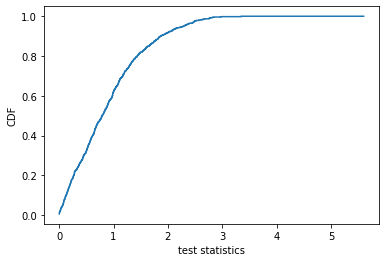

In [159]:
cdfs = [EvalCdf(test_stats,ts) for ts in test_stats]
plt.step(sorted(test_stats),cdfs)
plt.xlabel("test statistics")
plt.ylabel("CDF")

The result pvalue is about 0.0, which means that we expect to see a difference as big as the observed effect about 0% of the time. So this effect is statistically significant.


If we run the same analysis with estimated salary, the computed p-value is 0; after 1000 attempts, the simulation never yields an effect as big as the observed difference, 18564.80. So we would report p < 0.001, and conclude that the difference in estimated salary is statistically significant.

### Other statistics Test


Choosing the best test statistic depends on what question you are trying to address. For example, if the relevant question is whether age are different for purchasing customer, then it makes sense to test the absolute difference in means, as we did in the previous section.

If we had some reason to think that purchasing customer are likely to be older, then we would not take the absolute value of the difference; instead we would use this test statistic:

### DiffMeansOneSided

In [160]:
def TestStatistic(data):
    group1, group2 = data
    test_stat = group1.mean() - group2.mean()
    return test_stat

def MakeModel(data):
    group1, group2 = data
    n, m = len(group1), len(group2)
    pool = np.hstack((group1, group2))
    #print(pool.shape)
    return pool, n
    
def RunModel(pool, n):
    np.random.shuffle(pool)
    data = pool[:n], pool[n:]
    return data

DiffMeansOneSided inherits MakeModel and RunModel from above testing technique; the only difference is that TestStatistic does not take the absolute value of the difference. This kind of test is called one-sided because it only counts one side of the distribution of differences. The previous test, using both sides, is two-sided.

For this version of the test, the p-value is half of previous. In general the p-value for a one-sided test is about half the p-value for a two-sided test, depending on the shape of the distribution.

The one-sided hypothesis, that purchasing customer is old, is more specific than the two-sided hypothesis, so the p-value is smaller.

We can use the same framework to test for a difference in standard deviation. So we might hypothesize that the standard deviation is higher. Here’s how we can test that:

### DiffStdPermute

In [161]:
def TestStatistic(data):
    group1, group2 = data
    test_stat = group1.std() - group2.std()
    return test_stat

def MakeModel(data):
    group1, group2 = data
    n, m = len(group1), len(group2)
    pool = np.hstack((group1, group2))
    #print(pool.shape)
    return pool, n
    
def RunModel(pool, n):
    np.random.shuffle(pool)
    data = pool[:n], pool[n:]
    return data


def sample_generator(data):
    pool, n = MakeModel(data)
    return RunModel(pool, n)

This is a one-sided test because the hypothesis is that the standard deviation for customer purchasing is high, not just different. The p-value is 0.23, which is not statistically significant.

In [162]:
data = purchased_customer.Age.values, no_purchase.Age.values
ht = sample_generator(data)
actual_diff =  TestStatistic(data)

def calculate_pvalue(data, iters=1000):
    test_stats = [TestStatistic(sample_generator(data))
                           for _ in range(iters)]
    count = sum(1 for x in test_stats if x >= actual_diff)
    return sorted(test_stats),count / iters

In [163]:
actual_diff

0.46595573888017316

In [164]:
test_stats, pval =  calculate_pvalue(ht)

Text(0, 0.5, 'CDF')

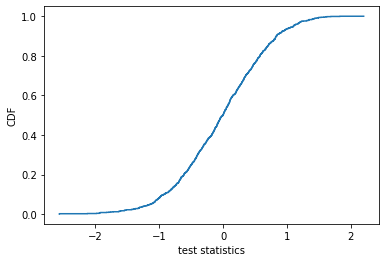

In [165]:
cdfs = [EvalCdf(test_stats,ts) for ts in test_stats]
plt.step(sorted(test_stats),cdfs)
plt.xlabel("test statistics")
plt.ylabel("CDF")

In [166]:
pval

0.252

### Testing Correlation

This framework can also test correlations. For example, in the NSFG data set, the correlation between customer's Age and his estimated salary is about 0.11. It seems like older customers have more salary. But could this effect be due to chance?

For the test statistic, I use Pearson’s correlation, but Spearman’s would work as well. If we had reason to expect positive correlation, we would do a one-sided test. But since we have no such reason, I’ll do a two-sided test using the absolute value of correlation.

The null hypothesis is that there is no correlation between customers age and his salary. By shuffling the observed values, we can simulate a world where the distributions of age and salary are the same, but where the variables are unrelated:

In [167]:
Corr(social_network["Age"], social_network["EstimatedSalary"])

0.11872351731101616

In [168]:
def TestStatistic(data):
    xs, ys = data
    test_stat = abs(Corr(xs, ys))
    return test_stat

def RunModel(data):
    xs, ys = data
    xs = np.random.permutation(xs)
    return xs, ys



data is a pair of sequences. TestStatistic computes the absolute value of Pearson’s correlation. RunModel shuffles the xs and returns simulated data.

In [169]:
data = social_network.Age.values, social_network.EstimatedSalary.values
actual_diff = TestStatistic(data)

def calculate_pvalue(data, iters=1000):
    test_stats = [TestStatistic(RunModel(data))
                           for _ in range(iters)]
    count = sum(1 for x in test_stats if x >= actual_diff)
    return sorted(test_stats),count / iters

In [170]:
test_stats, pval =  calculate_pvalue(data)

In [171]:
pval

0.017

The actual correlation is 0.11. The computed p-value is 0.019; after 1000 iterations the largest simulated correlation is 0.16. So although the observed correlation is small, it is statistically significant.
This example is a reminder that “statistically significant” does not always mean that an effect is important, or significant in practice. It only means that it is unlikely to have occurred by chance.

### Testing Proportions

Suppose you run a casino and you suspect that a customer is using a crooked die; that is, one that has been modified to make one of the faces more likely than the others. You apprehend the alleged cheater and confiscate the die, but now you have to prove that it is crooked. You roll the die 60 times and get the following results:

On average you expect each value to appear 10 times. In this dataset, the value 3 appears more often than expected, and the value 4 appears less often. But are these differences statistically significant?

Value
1
2
3
4
5
6

Frequency
8
9
19
5
8
11

To test this hypothesis, we can compute the expected frequency for each value, the difference between the expected and observed frequencies, and the total absolute difference. In this example, we expect each side to come up 10 times out of 60; the deviations from this expectation are -2, -1, 9, -5, -2, and 1; so the total absolute difference is 20. 
How often would we see such a difference by chance?

In [172]:
def TestStatistic(data):
    observed = data
    n = sum(observed)
    expected = np.ones(6) * n / 6
    test_stat = sum(abs(observed - expected))
    return test_stat
def RunModel(data):
    n = sum(data)
    values = [1, 2, 3, 4, 5, 6]
    rolls = np.random.choice(values, n, replace=True)
    freqs = Counter(rolls)
    freqs = list(freqs.values())
    return freqs

The data are represented as a list of frequencies: the observed values are [8, 9, 19, 5, 8, 11]; the expected frequencies are all 10. The test statistic is the sum of the absolute differences 


The null hypothesis is that the die is fair, so we simulate that by drawing random samples from values. RunModel uses Hist to compute and return the list of frequencies.

In [173]:
data = [8, 9, 19, 5, 8, 11]
actual_diff = TestStatistic(data)

def calculate_pvalue(data, iters=1000):
    test_stats = [TestStatistic(RunModel(data))
                           for _ in range(iters)]
    count = sum(1 for x in test_stats if x >= actual_diff)
    return sorted(test_stats),count / iters

In [174]:
test_stats, pval = calculate_pvalue(data)

In [175]:
pval

0.131

The p-value for this data is 0.13, which means that if the die is fair we expect to see the observed total deviation, or more, about 13% of the time. So the apparent effect is not statistically significant.

### Chi-squared tests

In the previous section we used total deviation as the test statistic. But for testing proportions it is more common to use the chi-squared statistic:
    
                    χ2 = 􏰄 SUMMATION (Oi − Ei)^2 / Ei
                    
Where Oi are the observed frequencies and Ei are the expected frequencies. Here’s the Python code:

In [176]:
def TestStatistic(self, data):
        observed = data
        n = sum(observed)
        expected = np.ones(6) * n / 6
        test_stat = sum((observed - expected)**2 / expected)
        return test_stat

Squaring the deviations (rather than taking absolute values) gives more weight to large deviations. Dividing through by expected standardizes the deviations, although in this case it has no effect because the expected fre- quencies are all equal.

The p-value using the chi-squared statistic is 0.04, substantially smaller than what we got using total deviation, 0.13. If we take the 5% threshold seriously, we would consider this effect statistically significant. But considering the two tests togther, I would say that the results are borderline. I would not rule out the possibility that the die is crooked, but I would not convict the accused cheater.

This example demonstrates an important point: the p-value depends on the choice of test statistic and the model of the null hypothesis, and sometimes these choices determine whether an effect is statistically significant or not.


### Errors

In classical hypothesis testing, an effect is considered statistically significant if the p-value is below some threshold, commonly 5%. This procedure raises two questions:

* If the effect is actually due to chance, what is the probability that we will wrongly consider it significant? This probability is the false positive rate.

* If the effect is real, what is the chance that the hypothesis test will fail? This probability is the false negative rate.

The false positive rate is relatively easy to compute: if the threshold is 5%, the false positive rate is 5%. Here’s why:

* If there is no real effect, the null hypothesis is true, so we can compute the distribution of the test statistic by simulating the null hypothesis. Call this distribution CDFT .

* Each time we run an experiment, we get a test statistic, t, which is drawn from CDFT . Then we compute a p-value, which is the probability that a random value from CDFT exceeds t, so that’s 1−CDFT(t).

* The p-value is less than 5% if CDFT (t) is greater than 95%; that is, if t exceeds the 95th percentile. And how often does a value chosen from CDFT exceed the 95th percentile? 5% of the time.

So if you perform one hypothesis test with a 5% threshold, you expect a false positive 1 time in 20.

### Power

The false negative rate is harder to compute because it depends on the actual effect size, and normally we don’t know that. One option is to compute a rate conditioned on a hypothetical effect size.

For example, if we assume that the observed difference between groups is accurate, we can use the observed samples as a model of the population and run hypothesis tests with simulated data:

In [177]:
def resample(xs):
    return np.random.choice(xs, len(xs), replace=True)

def TestStatistic(data):
    group1, group2 = data
    test_stat = abs(group1.mean() - group2.mean())
    return test_stat
    
def MakeModel(data):
    group1, group2 = data
    n, m = len(group1), len(group2)
    pool = np.hstack((group1, group2))
    #print(pool.shape)
    return pool, n
    
def RunModel(pool, n):
    np.random.shuffle(pool)
    data = pool[:n], pool[n:]
    return data

def sample_generator(data):
    pool, n = MakeModel(data)
    return RunModel(pool, n)


In [178]:
data = purchased_customer.Age.values, no_purchase.Age.values
ht = sample_generator(data)
actual_diff =  TestStatistic(data)

In [179]:
def calculate_pvalue(data, iters=1000):
    test_stats = [TestStatistic(sample_generator(data))
                           for _ in range(iters)]
    count = sum(1 for x in test_stats if x >= actual_diff)
    return sorted(test_stats),count / iters

In [180]:
def FalseNegRate(data, num_runs=100):
    group1, group2 = data
    count = 0
    for i in range(num_runs):
        sample1 = resample(group1)
        sample2 = resample(group2)
        ht = sample_generator((sample1,sample2))
        test_stats, pval =  calculate_pvalue(ht)
        if pval > 0.05:
            count += 1
    return count / num_runs

FalseNegRate takes data in the form of two sequences, one for each group. Each time through the loop, it simulates an experiment by drawing a random sample from each group and running a hypothesis test. Then it checks the result and counts the number of false negatives.

Resample takes a sequence and draws a sample with the same length, with replacement:

In [181]:
data = purchased_customer.Age.values, no_purchase.Age.values
neg_rate = FalseNegRate(data)

In [182]:
neg_rate

0.0

### Replication

The hypothesis testing process I demonstrated in this above, strictly speaking, good practice.

First, I performed multiple tests. If you run one hypothesis test, the chance of a false positive is about 1 in 20, which might be acceptable. But if you run 20 tests, you should expect at least one false positive, most of the time.

Second, I used the same dataset for exploration and testing. If you explore a large dataset, find a surprising effect, and then test whether it is significant, you have a good chance of generating a false positive.

To compensate for multiple tests, you can adjust the p-value threshold (see https://en.wikipedia.org/wiki/Holm-Bonferroni_method). Or you can address both problems by partitioning the data, using one set for exploration and the other for testing.

In some fields these practices are required or at least encouraged. But it is also common to address these problems implicitly by replicating published results. Typically the first paper to report a new result is considered ex- ploratory. Subsequent papers that replicate the result with new data are considered confirmatory.

### Linear Least Squares

Correlation coefficients measure the strength and sign of a relationship, but not the slope. There are several ways to estimate the slope; the most common is a **linear least squares fit.** A “linear fit” is a line intended to model the relationship between variables. A “least squares” fit is one that minimizes the mean squared error (MSE) between the line and the data.

Suppose we have a sequence of points, ys, that we want to express as a function of another sequence xs. If there is a linear relationship between xs and ys with intercept inter and slope slope, 

    we expect each y[i] to be inter + slope * x[i].

But unless the correlation is perfect, this prediction is only approximate. The vertical deviation from the line, or residual, is

    res = ys - (inter + slope * xs)

The residuals might be due to random factors like measurement error, or non- random factors that are unknown. For example, if we are trying to predict Salary as a function of experience, unknown factors might include initial package, responsibilites, and role etc.

If we get the parameters inter and slope wrong, the residuals get bigger, so it makes intuitive sense that the parameters we want are the ones that minimize the residuals.

We might try to minimize the absolute value of the residuals, or their squares, or their cubes; but the most common choice is to minimize the sum of squared residuals, sum(res^2)).

### Why? There are three good reasons and one less important one:

* Squaring has the feature of treating positive and negative residuals the same, which is usually what we want.
* Squaring gives more weight to large residuals, but not so much weight that the largest residual always dominates.
* If the residuals are uncorrelated and normally distributed with mean 0 and constant (but unknown) variance, then the least squares fit is also the maximum likelihood estimator of inter and slope. See https://en.wikipedia.org/wiki/Linear_regression.
* The values of inter and slope that minimize the squared residuals can be computed efficiently.

The last reason made sense when computational efficiency was more important than choosing the method most appropriate to the problem at hand. That’s no longer the case, so it is worth considering whether squared residuals are the right thing to minimize.

For example, if you are using xs to predict values of ys, guessing too high might be better (or worse) than guessing too low. In that case you might want to compute some cost function for each residual, and minimize total cost, sum(cost(res)). However, computing a least squares fit is quick, easy and often good enough.

In [183]:
#Implementation of Linear Least square

def LeastSquares(xs, ys):
    meanx, varx = pd.Series(xs).mean(), pd.Series(xs).var()
    meany = pd.Series(ys).mean()
    slope = Cov(xs, ys, meanx, meany) / varx
    inter = meany - slope * meanx
    return inter, slope

LeastSquares takes sequences xs and ys and returns the estimated parameters inter and slope. For details on how it works, see http://wikipedia.org/wiki/Numerical_methods_for_linear_least_squares.

FitLine, which takes inter and slope and re- turns the fitted line for a sequence of xs.


In [184]:
def FitLine(xs, inter, slope):
    fit_xs = np.sort(xs)
    fit_ys = inter + slope * fit_xs
    return fit_xs, fit_ys

### Least square fit between salary and experience

In [185]:
regression_data = pd.read_csv("Salary_Data.csv")

In [186]:
inter, slope = LeastSquares(regression_data["YearsExperience"], regression_data["Salary"])

In [187]:
fit_xs, fit_ys = FitLine(regression_data["YearsExperience"], inter, slope)

In [188]:
print("intercept: ", inter)
print("Slope: ", slope)

intercept:  27465.893525379724
Slope:  9134.963577406575


The estimated intercept and slope are 27465.89 and 9134.96 salary per year. These values are hard to interpret in this form: the intercept is the expected salary of an employee, who has 0 year experience, like salary for fresher.

Text(0, 0.5, 'Salary')

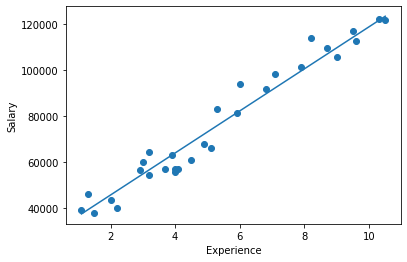

In [189]:
plt.scatter(regression_data["YearsExperience"], regression_data["Salary"])
plt.plot(fit_xs, fit_ys)
plt.xlabel("Experience")
plt.ylabel("Salary")

It’s a good idea to look at a figure like this to assess whether the relationship is linear and whether the fitted line seems like a good model of the relationship.

Another useful test is to plot the residuals. A residuals function below

In [190]:
def Residuals(xs, ys, inter, slope):
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    res = ys - (inter + slope * xs)
    return res

Residuals takes sequences xs and ys and estimated parameters inter and slope. It returns the differences between the actual values and the fitted line.

In [191]:
residuals = list(Residuals(regression_data["YearsExperience"], regression_data["Salary"], inter, slope))

In [192]:
regression_data["Residuals"] = residuals

In [193]:
bins = np.arange(0, 15, 2)
indices = np.digitize(regression_data.YearsExperience, bins)
groups = regression_data.groupby(indices)
for i, group in groups:
    print(i, len(group))

1 3
2 8
3 8
4 4
5 5
6 2


In [194]:
year_exps = [group.YearsExperience.mean() for i, group in groups]

In [195]:
age_residuals = defaultdict(list)
for i, grp in groups:
    for res in grp["Residuals"]:
        age_residuals[i].append(EvalCdf(grp["Residuals"], res))

In [196]:
age_residuals

defaultdict(list,
            {1: [0.6666666666666666, 1.0, 0.3333333333333333],
             2: [0.5, 0.125, 0.75, 0.875, 0.375, 1.0, 0.25, 0.625],
             3: [0.125, 0.625, 0.375, 0.5, 0.75, 0.25, 1.0, 0.875],
             4: [1.0, 0.5, 0.75, 0.25],
             5: [1.0, 0.6, 0.2, 0.8, 0.4],
             6: [1.0, 0.5]})

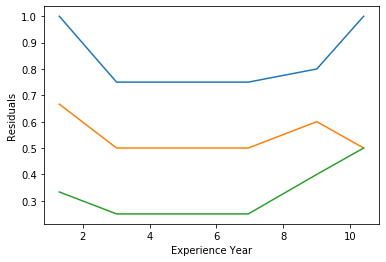

In [197]:
for percent in [75, 50, 25]:
    residue = [Percentile(age_residuals[k], percent) for k,v in age_residuals.items()]
    label = '%dth' %percent
    plt.plot(year_exps, residue)
    plt.xlabel("Experience Year")
    plt.ylabel("Residuals")

Ideally these lines should be flat, indicating that the residuals are random, and parallel, indicating that the variance of the residuals is the same for all age groups. In fact, the lines are close to parallel, so that’s good; but they have some curvature, indicating that the relationship is nonlinear. Nevertheless, the linear fit is a simple model that is probably good enough for some purposes.

### Estimation

The parameters slope and inter are estimates based on a sample; like other estimates, they are vulnerable to sampling bias, measurement error, and sampling error. sampling bias is caused by non-representative sampling, measurement error is caused by errors in collecting and recording data, and sampling error is the result of measuring a sample rather than the entire population.

To assess sampling error, we ask, “If we run this experiment again, how much variability do we expect in the estimates?” We can answer this question by running simulated experiments and computing sampling distributions of the estimates.

### Goodness of Fit

There are several ways to measure the quality of a linear model, or goodness
of fit. One of the simplest is the standard deviation of the residuals.

If you use a linear model to make predictions, Std(res) is the root mean squared error (RMSE) of your predictions.

Another way to measure goodness of fit is the coefficient of determina- tion, usually denoted R2 and called “R-squared”:

In [198]:
def CoefDetermination(ys, res):
    return 1 - pd.Series(res).var() / pd.Series(ys).var()

Var(res) is the MSE of your guesses using the model, Var(ys) is the MSE without it. So their ratio is the fraction of MSE that remains if you use the model, and R2 is the fraction of MSE the model eliminates.

There is a simple relationship between the coefficient of determination and Pearson’s coefficient of correlation: R2 = ρ2. For example, if ρ is 0.8 or -0.8, R2 = 0.64.

Although ρ and R2 are often used to quantify the strength of a relationship, they are not easy to interpret in terms of predictive power. In my opinion, Std(res) is the best representation of the quality of prediction, especially if it is presented in relation to Std(ys).

**For example, when people talk about the validity of the SAT (a standardized test used for college admission in the U.S.) they often talk about correlations between SAT scores and other measures of intelligence.
According to one study, there is a Pearson correlation of ρ = 0.72 between total SAT scores and IQ scores, which sounds like a strong correlation. But R2 = ρ2 = 0.52, so SAT scores account for only 52% of variance in IQ.**


In [199]:
#IQ scores are normalized with Std(ys) = 15, so
var_ys = 15**2
rho = 0.72
r2 = rho**2
var_res = (1 - r2) * var_ys
std_res = math.sqrt(var_res)
print(std_res)

10.409610943738484


So using SAT score to predict IQ reduces RMSE from 15 points to 10.4 points. A correlation of 0.72 yields a reduction in RMSE of only 31%.

If you see a correlation that looks impressive, remember that R2 is a better indicator of reduction in MSE, and reduction in RMSE is a better indicator of predictive power.

### Testing a linear model

The effect of years of experience is high on salary. So is it possible that the apparent relationship is due to chance? There are several ways we might test the results of a linear fit.

One option is to test whether the apparent reduction in MSE is due to chance. In that case, the test statistic is R2 and the null hypothesis is that there is no relationship between the variables. We can simulate the null hypothesis by permutation. In fact, because R2 = ρ2, a one-sided test of R2 is equivalent to a two-sided test of ρ. We’ve already done that test, and found p < 0.001, so we conclude that the apparent relationship between experience and salary is statistically significant.

Another approach is to test whether the apparent slope is due to chance. The null hypothesis is that the slope is actually zero; in that case we can model the salary as random variations around their mean. Try out hypothesis as before!

In [200]:
Corr(regression_data["YearsExperience"], regression_data["Salary"])

0.9782416184887599

In [206]:
def TestStatistic(data):
    exp, sal = data
    _, slope = LeastSquares(exp, sal)
    return slope
def MakeModel(data):
    _, sals = data
    ybar = sals.mean()
    res = sals - ybar
    return ybar, res
def RunModel(data):
    exp, _ = data
    sals = ybar + np.random.permutation(res)
    return exp, sals

In [207]:
ybar, res = MakeModel(data)

The data are represented as sequences of exp and sals. The test statistic is the slope estimated by LeastSquares. The model of the null hypothesis is represented by the mean sals of all employees and the deviations from the mean. To generate simulated data, we permute the deviations and add them to the mean.

In [208]:
data = regression_data.YearsExperience.values, regression_data.Salary.values
actual_diff =  TestStatistic(data)

In [209]:
def calculate_pvalue(data, iters=1000):
    test_stats = [TestStatistic(RunModel(data))
                           for _ in range(iters)]
    count = sum(1 for x in test_stats if x >= actual_diff)
    return sorted(test_stats),count / iters

In [210]:
test_stats, pval = calculate_pvalue(data)

In [211]:
pval

0.0

The p-value is less than 0.001, so although the estimated slope is small, it is unlikely to be due to chance.

### Weighted Resampling

As an example, if you survey 100,000 people in a country of 300 million, each respondent represents 3,000 people. If you oversample one group by a factor of 2, each person in the oversampled group would have a lower weight, about 1500.

To correct for oversampling, we can use resampling; that is, we can draw samples from the survey using probabilities proportional to sampling weights. Then, for any quantity we want to estimate, we can generate sampling dis- tributions, standard errors, and confidence intervals.

### Regression

The linear least squares fit is an example of regression, which is the more general problem of fitting any kind of model to any kind of data. This use of the term “regression” is a historical accident; it is only indirectly related to the original meaning of the word.

The goal of regression analysis is to describe the relationship between one set of variables, called the dependent variables, and another set of variables, called independent or explanatory variables.

Previously we used employee's experience as an explanatory variable to predict salary as a dependent variable. When there is only one depen- dent and one explanatory variable, that’s simple regression. Here, we move on to multiple regression, with more than one explanatory variable. If there is more than one dependent variable, that’s multivariate regression.

If the relationship between the dependent and explanatory variable is linear, that’s linear regression. For example, if the dependent variable is y and the explanatory variables are x1 and x2, we would write the following linear regression model:

                                    y = β0 + β1x1 + β2x2 + ε

where β0 is the intercept, β1 is the parameter associated with x1, β2 is the parameter associated with x2, and ε is the residual due to random variation or other unknown factors.

Given a sequence of values for y and sequences for x1 and x2, we can find the parameters, β0 , β1 , and β2 , that minimize the sum of ε2 . This process is called ordinary least squares. The computation is similar to LeastSquare, but generalized to deal with more than one explanatory variable. You can find the details at https://en.wikipedia.org/wiki/Ordinary_least_squares

### Linear Regression using statsmodel

For multiple regression we’ll switch to StatsModels, a Python package that provides several forms of regression and other analyses. If you are using Anaconda, you already have StatsModels; otherwise you might have to install it.

In [212]:
import statsmodels.formula.api as smf
formula = 'Salary ~ YearsExperience'
model = smf.ols(formula, data=regression_data)
results = model.fit()

In [213]:
results

statsmodels provides two interfaces (APIs); the “formula” API uses strings to identify the dependent and explanatory variables. It uses a syntax called patsy; in this example, the ~ operator separates the dependent variable on the left from the explanatory variables on the right.

smf.ols takes the formula string and the DataFrame, regression_data, and returns an OLS object that represents the model. The name ols stands for “ordinary least squares.”

The fit method fits the model to the data and returns a RegressionResults object that contains the results.


The results are also available as attributes. params is a Series that maps from variable names to their parameters, so we can get the intercept and slope like this:

In [214]:
inter = results.params['Intercept']
slope = results.params['YearsExperience']
slope_pvalue = results.pvalues['YearsExperience']
print(slope_pvalue)

1.1430681092271316e-20


pvalues is a Series that maps from variable names to the associated p-values, so we can check whether the estimated slope is statistically significant:

The p-value associated with agepreg is 1.14e-20, which is less than 0.001, as
expected.

In [215]:
print(results.summary())
print(results.rsquared)

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 29 Apr 2020   Prob (F-statistic):           1.14e-20
Time:                        00:32:24   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     

results.rsquared contains R2, which is 0.0047. results also provides f_pvalue, which is the p-value associated with the model as a whole, similar to testing whether R2 is statistically significant.
And results provides resid, a sequence of residuals, and fittedvalues, a sequence of fitted values corresponding to agepreg.

The results object provides summary(), which represents the results in a readable format.

    print(results.summary())
    
**Betting Pool** https://en.wikipedia.org/wiki/Betting_pool

### Theory

Linear regression can be generalized to handle other kinds of dependent vari- ables. If the dependent variable is boolean, the generalized model is called logistic regression. If the dependent variable is an integer count, it’s called Poisson regression.

Suppose a friend of yours is pregnant and you want to predict whether the baby is a boy or a girl. You could use data from the NSFG to find factors that affect the “sex ratio”, which is conventionally defined to be the probability of having a boy.

If you encode the dependent variable numerically, for example 0 for a girl and 1 for a boy, you could apply ordinary least squares, but there would be problems. The linear model might be something like this:

    y = β0 + β1x1 + β2x2 + ε

Where y is the dependent variable, and x1 and x2 are explanatory variables.

Then we could find the parameters that minimize the residuals.
The problem with this approach is that it produces predictions that are hard to interpret. Given estimated parameters and values for x1 and x2, the model might predict y = 0.5, but the only meaningful values of y are 0 and 1.

It is tempting to interpret a result like that as a probability; for example, we might say that a respondent with particular values of x1 and x2 has a 50% chance of having a boy. But it is also possible for this model to predict y = 1.1 or y = −0.1, and those are not valid probabilities.

Logistic regression avoids this problem by expressing predictions in terms of odds rather than probabilities. If you are not familiar with odds, “odds in favor” of an event is the ratio of the probability it will occur to the probability that it will not.

So if I think my team has a 75% chance of winning, I would say that the odds in their favor are three to one, because the chance of winning is three times the chance of losing.

Odds and probabilities are different representations of the same information. Given a probability, you can compute the odds like this:

    o = p / (1-p)

Given odds in favor, you can convert to probability like this:
    
    p = o / (o+1)

Logistic regression is based on the following model: logo=β0 +β1x1 +β2x2 +ε

Where o is the odds in favor of a particular outcome; in the example, o would be the odds of having a boy.

Suppose we have estimated the parameters β0, β1, and β2 (I’ll explain how in a minute). And suppose we are given values for x1 and x2. We can compute the predicted value of log o, and then convert to a probability:
    o = np.exp(log_o)
    p = o / (o+1)
So in the office pool scenario we could compute the predictive probability of having a boy. But how do we estimate the parameters?

### Estimating parameters

Unlike linear regression, logistic regression does not have a closed form solu- tion, so it is solved by guessing an initial solution and improving it iteratively.
The usual goal is to find the maximum-likelihood estimate (MLE), which is the set of parameters that maximizes the likelihood of the data. For example, suppose we have the following data:

In [216]:
y = np.array([0, 1, 0, 1])
x1 = np.array([0, 0, 0, 1])
x2 = np.array([0, 1, 1, 1])

In [217]:
#And we start with the initial guesses
β0 = -1.5, 
β1 = 2.8, 
β2 = 1.1

In [218]:
beta = [-1.5, 2.8, 1.1]

In [219]:
#Then for each row we can compute log_o:
log_o = beta[0] + beta[1] * x1 + beta[2] * x2

In [220]:
#convert from log odds to probabilities:
o = np.exp(log_o)

In [221]:
p = o / (o+1)

Notice that when log_o is greater than 0, o is greater than 1 and p is greater than 0.5.

The likelihood of an outcome is p when y==1 and 1-p when y==0. For example, if we think the probability of a boy is 0.8 and the outcome is a boy, the likelihood is 0.8; if the outcome is a girl, the likelihood is 0.2. We can compute that like this:

In [222]:
likes = y * p + (1-y) * (1-p)
print(likes)

[0.81757448 0.40131234 0.59868766 0.9168273 ]


In [223]:
#The overall likelihood of the data is the product of likes:
like = np.prod(likes)

For these values of beta, the likelihood of the data is 0.18. The goal of logistic regression is to find parameters that maximize this like- lihood. To do that, most statistics packages use an iterative solver like Newton’s method (see https://en.wikipedia.org/wiki/Logistic_regression#Model_fitting).

**Note** I have skipped few lessons on Multiple regression and Logistic regression, as the lesson where straightforward.
Only difference between them is the dependent variable which is binary in logistics and continous in ml regression. Refer the thinkstat books for reference for implementation.

### Time Series Analysis

A time series is a sequence of measurements from a system that varies in time. One famous example is the “hockey stick graph” that shows global average temperature over time (see https://en.wikipedia.org/wiki/Hockey_stick_graph).

The example I work with in this chapter comes from Zachary M. Jones, a researcher in political science who studies the black market for cannabis in the U.S. (http://zmjones.com/marijuana). He collected data from a web site called “Price of Weed” that crowdsources market information by asking participants to report the price, quantity, quality, and location of cannabis transactions (http://www.priceofweed.com/). The goal of his project is to investigate the effect of policy decisions, like legalization, on markets. I find this project appealing because it is an example that uses data to address important political questions, like drug policy.

I hope you will find this chapter interesting, but I’ll take this opportunity to reiterate the importance of maintaining a professional attitude to data analysis. Whether and which drugs should be illegal are important and difficult public policy questions; our decisions should be informed by accurate data reported honestly.

In [224]:
mj_clean = pd.read_csv('mj-clean.csv', engine='python', parse_dates=[5])
#parse_dates tells read_csv to interpret values in column 5 as dates and convert them to NumPy datetime64 objects.

The DataFrame has a row for each reported transaction and the following
columns:

* city: string city name.
* state: two-letter state abbreviation.
* price: price paid in dollars.
* amount: quantity purchased in grams.
* quality: high, medium, or low quality, as reported by the purchaser. • date: date of report, presumed to be shortly after date of purchase. • ppg: price per gram, in dollars.
* state.name: string state name.
* lat: approximate latitude of the transaction, based on city name.
* lon: approximate longitude of the transaction.

Each transaction is an event in time, so we could treat this dataset as a time series. But the events are not equally spaced in time; the number of transactions reported each day varies from 0 to several hundred. Many methods used to analyze time series require the measurements to be equally spaced, or at least things are simpler if they are.

In order to demonstrate these methods, I divide the dataset into groups by reported quality, and then transform each group into an equally spaced series by computing the mean daily price per gram.

In [225]:
def GroupByQualityAndDay(transactions):
    groups = transactions.groupby('quality')
    dailies = {}
    for name, group in groups:
        dailies[name] = GroupByDay(group)
    return dailies

groupby is a DataFrame method that returns a GroupBy object, groups; used in a for loop, it iterates the names of the groups and the DataFrames that represent them. Since the values of quality are low, medium, and high, we get three groups with those names.

The loop iterates through the groups and calls GroupByDay, which computes the daily average price and returns a new DataFrame:


In [226]:
def GroupByDay(transactions, func=np.mean):
    grouped = transactions[['date', 'ppg']].groupby('date')
    daily = grouped.aggregate(func)
    daily['date'] = daily.index
    start = daily.date[0]
    one_year = np.timedelta64(1, 'Y')
    daily['years'] = (daily.date - start) / one_year
    return daily

The parameter, transactions, is a DataFrame that contains columns date
and ppg. We select these two columns, then group by date.

The result, grouped, is a map from each date to a DataFrame that contains prices reported on that date. aggregate is a GroupBy method that iterates through the groups and applies a function to each column of the group; in this case there is only one column, ppg. So the result of aggregate is a DataFrame with one row for each date and one column, ppg.

Dates in these DataFrames are stored as NumPy datetime64 objects, which are represented as 64-bit integers in nanoseconds. For some of the analyses coming up, it will be convenient to work with time in more human-friendly units, like years. So GroupByDay adds a column named date by copying the index, then adds years, which contains the number of years since the first transaction as a floating-point number.
The resulting DataFrame has columns ppg, date, and years.


In [227]:
dailies = GroupByQualityAndDay(mj_clean)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/Applications/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


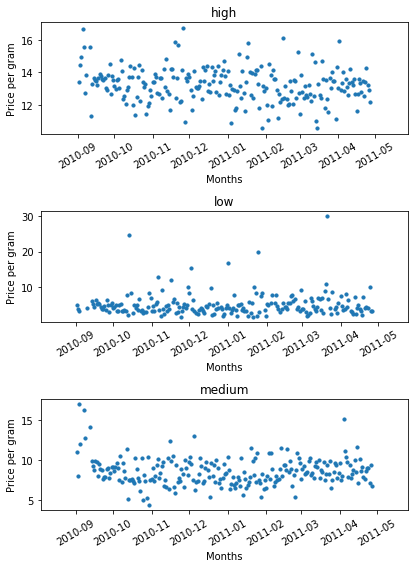

In [228]:
plt.figure(figsize=(6,8))
plt.subplot(3, 1, 1)
for i, (k, v) in enumerate(dailies.items()):
    plt.subplot(3, 1, i+1)
    plt.title(k)
    plt.scatter(dailies[k].index, dailies[k].ppg, s=10)
    plt.xticks(rotation=30)
    plt.ylabel("Price per gram")
    plt.xlabel("Months")
    plt.tight_layout()

One apparent feature in these plots is a gap around November 2013. It’s possible that data collection was not active during this time, or the data might not be available. We will consider ways to deal with this missing data later.
Visually, it looks like the price of high quality cannabis is declining during this period, and the price of medium quality is increasing. The price of low quality might also be increasing, but it is harder to tell, since it seems to be more volatile. Keep in mind that quality data is reported by volunteers, so trends over time might reflect changes in how participants apply these labels.


### Linear regression

Although there are methods specific to time series analysis, for many prob- lems a simple way to get started is by applying general-purpose tools like linear regression. The following function takes a DataFrame of daily prices and computes a least squares fit, returning the model and results objects from StatsModels:

In [229]:
def RunLinearModel(daily):
    model = smf.ols('ppg ~ years', data=daily)
    results = model.fit()
    return model, results

def SummarizeResults(results):
    """Prints the most important parts of linear regression results:
    results: RegressionResults object
    """
    for name, param in results.params.items():
        pvalue = results.pvalues[name]
        print('%s   %0.3g   (%.3g)' % (name, param, pvalue))

    try:
        print('R^2 %.4g' % results.rsquared)
        ys = results.model.endog
        print('Std(ys) %.4g' % ys.std())
        print('Std(res) %.4g' % results.resid.std())
        print('\n')
    except AttributeError:
        print('R^2 %.4g' % results.prsquared)
        print('\n')

In [230]:
#Then we can iterate through the qualities and fit a model to each:
for name, daily in dailies.items():
    model, results = RunLinearModel(daily)
    print(name)
    SummarizeResults(results)

high
Intercept   13.6   (1.86e-193)
years   -0.927   (0.011)
R^2 0.02729
Std(ys) 1.049
Std(res) 1.037


low
Intercept   4.98   (1.72e-21)
years   0.713   (0.566)
R^2 0.00156
Std(ys) 3.299
Std(res) 3.304


medium
Intercept   8.78   (1.16e-100)
years   -0.482   (0.434)
R^2 0.002658
Std(ys) 1.726
Std(res) 1.728




The estimated slopes indicate that the price of high quality cannabis dropped by about 71 cents per year during the observed interval; for medium quality it increased by 28 cents per year, and for low quality it increased by 57 cents per year. These estimates are all statistically significant with very small p-values.

The R2 value for high quality cannabis is 0.44, which means that time as an explanatory variable accounts for 44% of the observed variability in price. For the other qualities, the change in price is smaller, and variability in prices is higher, so the values of R2 are smaller (but still statistically significant).

In [231]:
#The following code plots the observed prices and the fitted values:
def PlotFittedValues(model, results, label=''):
    years = model.exog[:,1]
    values = model.endog
    plt.scatter(years, values, s=15, label=label)
    plt.plot(years, results.fittedvalues, label='model')
    plt.xlabel("years")
    plt.ylabel("ppg")

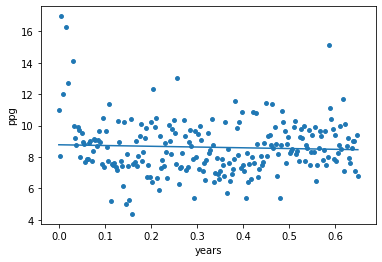

In [232]:
PlotFittedValues(model, results)

PlotFittedValues makes a scatter plot of the data points and a line plot of the fitted values. Plot shows the results for high quality cannabis. The model seems like a good linear fit for the data; nevertheless, linear regression is not the most appropriate choice for this data:

* First, there is no reason to expect the long-term trend to be a line or any other simple function. In general, prices are determined by supply and demand, both of which vary over time in unpredictable ways.
* Second, the linear regression model gives equal weight to all data, recent and past. For purposes of prediction, we should probably give more weight to recent data.
* Finally, one of the assumptions of linear regression is that the residuals are uncorrelated noise. With time series data, this assumption is often false because successive values are correlated.

### Moving Average

Most time series analysis is based on the modeling assumption that the ob- served series is the sum of three components:
* Trend: A smooth function that captures persistent changes.
* Seasonality: Periodic variation, possibly including daily, weekly,
monthly, or yearly cycles.
* Noise: Random variation around the long-term trend.

Regression is one way to extract the trend from a series, as we saw in the previous section. But if the trend is not a simple function, a good alternative is a moving average. A moving average divides the series into overlapping regions, called windows, and computes the average of the values in each window.

One of the simplest moving averages is the rolling mean, which computes the mean of the values in each window. For example, if the window size is 3, the rolling mean computes the mean of values 0 through 2, 1 through 3, 2 through 4, etc.

pandas provides rolling_mean, which takes a Series and a window size and returns a new Series.

In [233]:
series = pd.Series(np.arange(10))

In [234]:
moving_avg = series.rolling(3).mean()

The first two values are nan; the next value is the mean of the first three elements, 0, 1, and 2. The next value is the mean of 1, 2, and 3. And so on.

Before we can apply rolling mean to the cannabis data, we have to deal with missing values. There are a few days in the observed interval with no reported transactions for one or more quality categories, and a period in 2013 when data collection was not active.

In the DataFrames we have used so far, these dates are absent; the index skips days with no data. For the analysis that follows, we need to represent this missing data explicitly. We can do that by “reindexing” the DataFrame:

In [235]:
dates = pd.date_range(dailies["high"].index.min(), dailies["high"].index.max())
reindexed = dailies["high"].reindex(dates)

In [236]:
#dailies["high"].index

In [237]:
reindexed.shape

(238, 3)

The first line computes a date range that includes every day from the be- ginning to the end of the observed interval. The second line creates a new DataFrame with all of the data from daily, but including rows for all dates, filled with nan.

(array([734046., 734077., 734107., 734138., 734169., 734197., 734228.,
        734258.]), <a list of 8 Text xticklabel objects>)

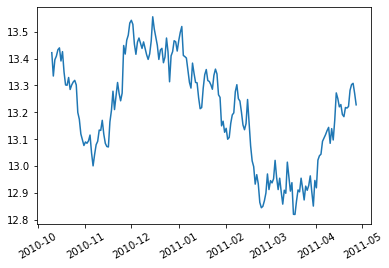

In [238]:
#Now we can plot the rolling mean like this:
#The window size is 30, so each value in roll_mean is the mean of 30 values from reindexed.ppg.
roll_mean = reindexed.ppg.rolling(30).mean()
plt.plot(roll_mean.index, roll_mean)
plt.xticks(rotation=30)

The rolling mean seems to do a good job of smoothing out the noise and extracting the trend. The first 29 values are nan, and wherever there’s a missing value, it’s followed by another 29 nans. There are ways to fill in these gaps, but they are a minor nuisance.

An alternative is the **exponentially-weighted moving average (EWMA)**, which has two advantages. First, as the name suggests, it computes a weighted average where the most recent value has the highest weight and the weights for previous values drop off exponentially. Second, the pandas implementation of EWMA handles missing values better.

(array([734016., 734046., 734077., 734107., 734138., 734169., 734197.,
        734228., 734258.]), <a list of 9 Text xticklabel objects>)

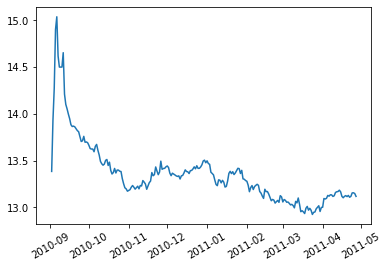

In [239]:
ewma = reindexed.ppg.ewm(30).mean()
plt.plot(ewma.index, ewma)
plt.xticks(rotation=30)

The span parameter corresponds roughly to the window size of a moving average; it controls how fast the weights drop off, so it determines the number of points that make a non-negligible contribution to each average.

above plot shows the EWMA for the same data. It is similar to the rolling mean, where they are both defined, but it has no missing values, which makes it easier to work with. The values are noisy at the beginning of the time series, because they are based on fewer data points.

### Missing Value

Now that we have characterized the trend of the time series, the next step is to investigate seasonality, which is periodic behavior. Time series data based on human behavior often exhibits daily, weekly, monthly, or yearly cycles. Next, I present methods to test for seasonality, but they don’t work well with missing data, so we have to solve that problem first.

A simple and common way to fill missing data is to use a moving average. The Series method fillna does just what we want:

In [240]:
reindexed.ppg.fillna(ewma, inplace=True)

Wherever reindexed.ppg is nan, fillna replaces it with the corresponding value from ewma. The inplace flag tells fillna to modify the existing Series rather than create a new one.

A drawback of this method is that it understates the noise in the series. We can solve that problem by adding in resampled residuals:


In [241]:
def Resample(xs, n=None):
    """Draw a sample from xs with the same length as xs.
    xs: sequence
    n: sample size (default: len(xs))
    returns: NumPy array
    """
    if n is None:
        n = len(xs)
    return np.random.choice(xs, n, replace=True)

In [242]:
resid = (reindexed.ppg - ewma).dropna()
fake_data = ewma + Resample(resid, len(reindexed))
reindexed.ppg.fillna(fake_data, inplace=True)

resid contains the residual values, not including days when ppg is nan. fake_data contains the sum of the moving average and a random sample of residuals. Finally, fillna replaces nan with values from fake_data.

The filled data is visually similar to the actual values. Since the resampled residuals are random, the results are different every time; later we’ll see how to characterize the error created by missing values.

### Serial correlation

As prices vary from day to day, you might expect to see patterns. If the price is high on Monday, you might expect it to be high for a few more days; and if it’s low, you might expect it to stay low. A pattern like this is called serial
correlation, because each value is correlated with the next one in the series.

To compute serial correlation, we can shift the time series by an interval called a lag, and then compute the correlation of the shifted series with the original:

In [243]:
def SerialCorr(series, lag=1):
    xs = series[lag:]
    ys = series.shift(lag)[lag:]
    corr = Corr(xs, ys)
    return corr

After the shift, the first lag values are nan, so I use a slice to remove them before computing Corr.

If we apply SerialCorr to the raw price data with lag 1, we find serial correlation 0.48 for the high quality category, 0.16 for medium and 0.10 for low. In any time series with a long-term trend, we expect to see strong serial correlations; for example, if prices are falling, we expect to see values above the mean in the first half of the series and values below the mean in the second half.

It is more interesting to see if the correlation persists if you subtract away the trend. For example, we can compute the residual of the EWMA and then compute its serial correlation:


In [244]:
ewma = reindexed.ppg.ewm(30).mean()
resid = reindexed.ppg - ewma
corr = SerialCorr(resid, 1)
print(corr)

-0.026011647993319918


With lag=1, the serial correlations for the de-trended data are -0.022 for high quality, -0.015 for medium, and 0.036 for low. These values are small, indicating that there is little or no one-day serial correlation in this series.

In [245]:
ewma = reindexed.ppg.ewm(30).mean()
resid = reindexed.ppg - ewma
corr = SerialCorr(resid, 7)
print(corr)

0.07690578012244383


In [246]:
ewma = reindexed.ppg.ewm(30).mean()
resid = reindexed.ppg - ewma
corr = SerialCorr(resid, 30)
print(corr)

0.0282719042575464


at this point we can tentatively conclude that there are no substantial seasonal patterns in these series, at least not with these lags.


### Autocorrelation

If you think a series might have some serial correlation, but you don’t know which lags to test, you can test them all! The autocorrelation function is a function that maps from lag to the serial correlation with the given lag. “Autocorrelation” is another name for serial correlation, used more often when the lag is not 1.

StatsModels, which we used for linear regression, also provides functions for time series analysis, including acf, which computes the autocorrelation function:


In [247]:
import statsmodels.tsa.stattools as smtsa
acf = smtsa.acf(resid, nlags=120, unbiased=True)

/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


In [248]:
acf[0], acf[1], acf[45], acf[60]

(1.0, -0.02608556249597254, 0.02600680689595809, 0.13267497291531813)

With lag=0, acf computes the correlation of the series with itself, which is always 1.

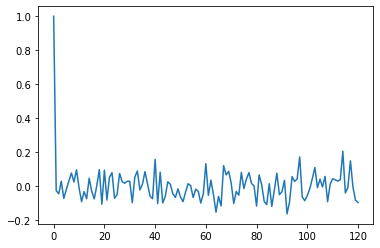

In [249]:
plt.plot(range(len(acf)),acf)

### Prediction

Time series analysis can be used to investigate, and sometimes explain, the behavior of systems that vary in time. It can also make predictions.

The linear regressions can be used for prediction. The RegressionResults class provides predict, which takes a DataFrame containing the explanatory variables and returns a sequence of predictions. 

If all we want is a single, best-guess prediction, we’re done. But for most purposes it is important to quantify error. In other words, we want to know how accurate the prediction is likely to be.

There are three sources of error we should take into account:

* Sampling error: The prediction is based on estimated parameters, which depend on random variation in the sample. If we run the exper- iment again, we expect the estimates to vary.

* Random variation: Even if the estimated parameters are perfect, the observed data varies randomly around the long-term trend, and we expect this variation to continue in the future.

* Modeling error: We have already seen evidence that the long-term trend is not linear, so predictions based on a linear model will eventually fail.

Another source of error to consider is unexpected future events. Agricultural prices are affected by weather, and all prices are affected by politics and law. As I write this, cannabis is legal in two states and legal for medical purposes in 20 more. If more states legalize it, the price is likely to go down. But if the federal government cracks down, the price might go up.
Modeling errors and unexpected future events are hard to quantify.

### Survival Analysis


Survival analysis is a way to describe how long things last. It is often used to study human lifetimes, but it also applies to “survival” of mechanical and electronic components, or more generally to intervals in time before an event.

If someone you know has been diagnosed with a life-threatening disease, you might have seen a “5-year survival rate,” which is the probability of surviving five years after diagnosis. That estimate and related statistics are the result of survival analysis.

### Survival Curves

The fundamental concept in survival analysis is the survival curve, S(t), which is a function that maps from a duration, t, to the probability of surviv- ing longer than t. If you know the distribution of durations, or “lifetimes”, finding the survival curve is easy; it’s just the complement of the CDF:

                                    S(t) = 1 − CDF(t)

where CDF(t) is the probability of a lifetime less than or equal to t.

### Hazard function

From the survival curve we can derive the hazard function; for pregnancy lengths, the hazard function maps from a time, t, to the fraction of pregnan- cies that continue until t and then end at t. To be more precise:
    
    λ(t) = S(t)−S(t+1) S (t)

The numerator is the fraction of lifetimes that end at t, which is also PMF(t)

### Inferring survival curves

If someone gives you the CDF of lifetimes, it is easy to compute the survival and hazard functions. But in many real-world scenarios, we can’t measure the distribution of lifetimes directly. We have to infer it.

For example, suppose you are following a group of patients to see how long they survive after diagnosis. Not all patients are diagnosed on the same day, so at any point in time, some patients have survived longer than others. If some patients have died, we know their survival times. For patients who are still alive, we don’t know survival times, but we have a lower bound.

If we wait until all patients are dead, we can compute the survival curve, but if we are evaluating the effectiveness of a new treatment, we can’t wait that long! We need a way to estimate survival curves using incomplete information.

As a more cheerful example, I will use NSFG data to quantify how long respondents “survive” until they get married for the first time. The range of respondents’ ages is 14 to 44 years, so the dataset provides a snapshot of women at different stages in their lives.

For women who have been married, the dataset includes the date of their first marriage and their age at the time. For women who have not been married, we know their age when interviewed, but have no way of knowing when or if they will get married.

Since we know the age at first marriage for some women, it might be tempt- ing to exclude the rest and compute the CDF of the known data. That is a bad idea. The result would be doubly misleading: (1) older women would be overrepresented, because they are more likely to be married when interviewed, and (2) married women would be overrepresented! In fact, this analysis would lead to the conclusion that all women get married, which is obviously incorrect.


### Kaplan-Meier estimation

In this example it is not only desirable but necessary to include observations of unmarried women, which brings us to one of the central algorithms in survival analysis, Kaplan-Meier estimation.

The general idea is that we can use the data to estimate the hazard function, then convert the hazard function to a survival curve. To estimate the hazard function, we consider, for each age, (1) the number of women who got married at that age and (2) the number of women “at risk” of getting married, which includes all women who were not married at an earlier age.


### Cohort  Effects

One of the challenges of survival analysis is that different parts of the esti- mated curve are based on different groups of respondents. The part of the curve at time t is based on respondents whose age was at least t when they were interviewed. So the leftmost part of the curve includes data from all respondents, but the rightmost part includes only the oldest respondents.

If the relevant characteristics of the respondents are not changing over time, that’s fine, but in this case it seems likely that marriage patterns are different for women born in different generations. We can investigate this effect by grouping respondents according to their decade of birth. Groups like this, defined by date of birth or similar events, are called cohorts, and differences between the groups are called cohort effects.

### Analytics Methods

Suppose you are a scientist studying gorillas in a wildlife preserve. Having weighed 9 gorillas, you find sample mean x ̄ = 90 kg and sample standard deviation, S = 7.5 kg. If you use x ̄ to estimate the population mean, what is the standard error of the estimate?

To answer that question, we need the sampling distribution of x ̄. We approximated this distribution by simulating the experiment (weighing 9 gorillas), computing x ̄ for each simulated experiment, and accu- mulating the distribution of estimates.

The result is an approximation of the sampling distribution. Then we use the sampling distribution to compute standard errors and confidence intervals:

1. The standard deviation of the sampling distribution is the standard error of the estimate; in the example, it is about 2.5 kg.

2. The interval between the 5th and 95th percentile of the sampling dis- tribution is a 90% confidence interval. If we run the experiment many times, we expect the estimate to fall in this interval 90% of the time. In the example, the 90% CI is (86, 94) kg.

Now we’ll do the same calculation analytically. We take advantage of the fact that the weights of adult female gorillas are roughly normally distributed. Normal distributions have two properties that make them amenable for anal- ysis: they are “closed” under linear transformation and addition. To explain what that means, I need some notation.

If the distribution of a quantity, X, is normal with parameters μ and σ, you can write
    
                                    X∼ N (μ,σ2)

where the symbol ∼ means “is distributed” and the script letter N stands for “normal.”

A linear transformation of X is something like X′ = aX+b, where a and b are real numbers. A family of distributions is closed under linear transformation if X′ is in the same family as X. The normal distribution has this property; 
    if X∼N (μ,σ2),

                                    X′ ∼ N (aμ+b,a2σ2) (1) 

Normal distributions are also closed under addition. If Z = X + Y and X∼N (μX,σX2 ) and Y ∼N (μY,σY2) then
                                    
                                    Z ∼ N(μX+μY,σX2 +σY2) (2)

In the special case Z = X + X, we have
            
                                    Z ∼ N (2μX , 2σX2 )
                                    
and in general if we draw n values of X and add them up, we have
        
                                    Z ∼ N (nμX , nσX2 )
 

### Sampling distributions

Now we have everything we need to compute the sampling distribution of x ̄. Remember that we compute x ̄ by weighing n gorillas, adding up the total weight, and dividing by n.

Assume that the distribution of gorilla weights, X, is approximately normal: 
        
                                   X∼N (μ,σ2)

If we weigh n gorillas, the total weight, Y , is distributed 

                                   Y∼N (nμ,nσ2)
                                   
using Equation 3. And if we divide by n, the sample mean, Z, is distributed 
        
                                   Z∼N (μ,σ2/n)
using Equation 1 with a = 1/n.

The distribution of Z is the sampling distribution of x ̄. The mean of Z is μ, which shows that x ̄ is an unbiased estimate of μ. The variance of the sampling distribution is σ2/n.

So the standard deviation of the sampling distribution, which is the standard error of the estimate, is σ/√n. In the example, σ is 7.5 kg and n is 9, so the standard error is 2.5 kg. That result is consistent with what we estimated by simulation, but much faster to compute!

We can also use the sampling distribution to compute confidence intervals. A 90% confidence interval for x ̄ is the interval between the 5th and 95th percentiles of Z. Since Z is normally distributed, we can compute percentiles by evaluating the inverse CDF.

There is no closed form for the CDF of the normal distribution or its inverse, but there are fast numerical methods and they are implemented in SciPy.

Given a probability, p, it returns the corresponding percentile from a normal distribution with parameters mu and sigma.  

In [250]:
def EvalNormalCdfInverse(p, mu=0, sigma=1):
    return scipy.stats.norm.ppf(p, loc=mu, scale=sigma)

### Central limit theorem

If we add values drawn from normal distributions, the distribution of the sum is normal. Most other distributions don’t have this property; if we add values drawn from other distributions, the sum does not generally have an analytic distribution.

But if we add up n values from almost any distribution, the distribution of the sum converges to normal as n increases.

More specifically, if the distribution of the values has mean and standard deviation μ and σ, the distribution of the sum is approximately N(nμ,nσ2).

This result is the Central Limit Theorem (CLT). It is one of the most useful tools for statistical analysis, but it comes with caveats:
* The values have to be drawn independently. If they are correlated, the CLT doesn’t apply (although this is seldom a problem in practice).
* The values have to come from the same distribution (although this requirement can be relaxed).
* The values have to be drawn from a distribution with finite mean and variance. So most Pareto distributions are out.
* The rate of convergence depends on the skewness of the distribution. Sums from an exponential distribution converge for small n. Sums from a lognormal distribution require larger sizes.

The Central Limit Theorem explains the prevalence of normal distributions in the natural world. Many characteristics of living things are affected by genetic and environmental factors whose effect is additive. The character- istics we measure are the sum of a large number of small effects, so their distribution tends to be normal.

### Correlation test
we used a permutation test for the correlation between Age and Estimated Salary, and found that it is statistically significant, with p-value less than 0.001.

Now we can do the same thing analytically. The method is based on this mathematical result: given two variables that are normally distributed and uncorrelated, if we generate a sample with size n, compute Pearson’s corre- lation, r, and then compute the transformed correlation

                                        t = r * sqrt(n-2/1-r^2)

the distribution of t is Student’s t-distribution with parameter n − 2. The t- distribution is an analytic distribution; the CDF can be computed efficiently using gamma functions.

We can use this result to compute the sampling distribution of correlation under the null hypothesis; that is, if we generate uncorrelated sequences of normal values, what is the distribution of their correlation? StudentCdf takes the sample size, n, and returns the sampling distribution of correlation:

In [251]:
def StudentCdf(n):
    ts = np.linspace(-3, 3, 101)
    ps = scipy.stats.t.cdf(ts, df=n-2)
    rs = ts / np.sqrt(n - 2 + ts**2)
    return thinkstats2.Cdf(rs, ps)

ts is a NumPy array of values for t, the transformed correlation. ps contains the corresponding probabilities, computed using the CDF of the Student’s t-distribution implemented in SciPy. The parameter of the t-distribution, df, stands for “degrees of freedom.” I won’t explain that term, but you can read about it at http://en.wikipedia.org/wiki/Degrees_of_freedom_(statistics).

To get from ts to the correlation coefficients, rs, we apply the inverse transform,

                                       r = t / sqrt(n − 2 + t^2)
                                       
The result is the sampling distribution of r under the null hypothesis. By the Central Limit Theorem, these moment- based statistics are normally distributed even if the data are not.


to occur if the variables are actually uncorrelated. Using the analytic distri- bution, we can compute just how unlikely:
    
                                       t = r * math.sqrt((n-2) / (1-r**2))
    
                                       p_value = 1 - scipy.stats.t.cdf(t, df=n-2)
    
We compute the value of t that corresponds to r=0.07, and then evaluate the t-distribution at t. The result is 2.9e-11. This example demonstrates an advantage of the analytic method: we can compute very small p-values. But in practice it usually doesn’t matter.

### Chi-squared test

chi-squared statistic to test whether a die is crooked. The chi-squared statistic measures the total normalized deviation from the expected values in a table:

                                     χ2 = 􏰄SUMMATION (Oi − Ei)^2 / Ei
                                     
One reason the chi-squared statistic is widely used is that its sampling distri- bution under the null hypothesis is analytic; by a remarkable coincidence1, it is called the chi-squared distribution. Like the t-distribution, the chi-squared CDF can be computed efficiently using gamma functions.

SciPy provides an implementation of the chi-squared distribution, which we use to compute the sampling distribution of the chi-squared statistic:

In [252]:
def ChiSquaredCdf(n):
    xs = np.linspace(0, 25, 101)
    ps = scipy.stats.chi2.cdf(xs, df=n-1)
    return thinkstats2.Cdf(xs, ps)

The parameter of the chi-squared distribution is “degrees of freedom” again. In this case the correct parameter is n-1, where n is the size of the table